<a href="https://colab.research.google.com/github/sordenesf/Heart-Disease/blob/main/Indicators_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Indicators of Heart Disease

- Fuente: Kaggle

- Licencia CC0: Public Domain

- URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/

#1 Carga de la información

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Week 11 - Deep Learning/04 Proyecto 2 - Parte 5/heart_2022_with_nans.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


#2 Análisis Exploratorio de Datos

##2.1 Datos duplicados

En primer lugar se revisa si entre los registros existen filas duplicadas:

In [5]:
df.duplicated().sum()

157

Puesto que se encuentran registros duplicados, se procede a eliminarlos:

In [6]:
df= df.drop_duplicates()

Se verifica la eliminación de los registros duplicados:

In [7]:
df.duplicated().sum()


0

##2.2 Columnas innecesarias:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

Se revisan columnas numéricas:

In [9]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434053.000000,435913.000000,439527.000000,416470.000000,403044.000000,396316.000000
mean,4.349372,4.384164,7.022909,1.702690,83.074632,28.529907
std,8.689968,8.388541,1.502618,0.107178,21.448241,6.554917
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


Se revisan columnas categóricas:

In [10]:
from sklearn.compose import make_column_selector
selector_cat = make_column_selector(dtype_include='object')
selector_num= make_column_selector(dtype_include='number')

Se revisan los grupos dentro de cada columna categórica:

In [11]:
for columna in selector_cat(df):
  print(df[columna].value_counts())
  print('\n','-'*40,'\n')

State
Washington              26142
New York                17784
Minnesota               16816
Ohio                    16482
Maryland                16410
Texas                   14237
Florida                 13385
Wisconsin               11273
Kansas                  11243
Massachusetts           11027
California              10948
Maine                   10646
Indiana                 10459
Virginia                10414
Arizona                 10184
Michigan                10054
South Carolina          10034
Utah                     9823
Connecticut              9771
Colorado                 9361
Georgia                  9234
Iowa                     8948
Vermont                  8801
New Jersey               8196
Hawaii                   7747
Nebraska                 7472
Missouri                 7438
South Dakota             7423
Montana                  7047
New Hampshire            6754
Idaho                    6280
Rhode Island             5891
Alaska                   5864
Okla

Realizada la revisión, **NO se detectan columnas innecesarias**

##2.3 Inconsistencias en los datos para los valores categóricos

En el punto anterior se revisaron los datos categóricos y no se detectaron datos inconsistentes en las columnas.

##2.4 Valores faltantes:

La cantidad de registros que contienen al menos un dato nulo son los siguientes:

In [12]:
filas_na = df.isna().any(axis=1).sum()
filas_na

198962

Porcentaje de filas con al menos un valor nulo:

In [13]:
filas_total = df.shape[0]
filas_na/filas_total

0.44713073768189227

Porcentaje de valores nulos en cada una de las filas del DataFrame:

In [14]:
df.isna().sum()*100/df.shape[0]

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.268105
PhysicalHealthDays            2.454520
MentalHealthDays              2.036519
LastCheckupTime               1.865498
PhysicalActivities            0.244508
SleepHours                    1.224338
RemovedTeeth                  2.551829
HadHeartAttack                0.687679
HadAngina                     0.988820
HadStroke                     0.348784
HadAsthma                     0.397326
HadSkinCancer                 0.705208
HadCOPD                       0.497556
HadDepressiveDisorder         0.630822
HadKidneyDisease              0.431710
HadArthritis                  0.590595
HadDiabetes                   0.243160
DeafOrHardOfHearing           4.607450
BlindOrVisionDifficulty       4.813529
DifficultyConcentrating       5.414911
DifficultyWalking             5.363672
DifficultyDressingBathing     5.341873
DifficultyErrands             5.733131
SmokerStatus             

Las filas que contienen al menos un valor nulo son un 47% del dataset, por lo que eliminar estos registros conlleva una enorme pérdida de información.

Mirando los valores nulos en cada una de sus columnas, ninguna de ellas no tiene más de un 20% de valores nulos, por lo que se imputarán valores para evitar la eliminación de la columna.

De las columnas, se sabe que el BMI es obtenido con la fórmula BMI = peso[Kg] / altura[m]**2
En este caso, se imputarán los valores  nulos de la columna BMI cuando la altura y el peso sean conocidos (no existe fuga de datos)

In [15]:
df['BMI'].isna().sum()

48659

In [16]:
# Filtro cuando el peso y la altura son datos conocidos, pero el BMI es nulo
mask_bmi = df['HeightInMeters'].notna() & df['WeightInKilograms'].notna() & df['BMI'].isna()
mask_bmi.sum()

2238

Se rellenan los valores que han sido filtrados:

In [17]:
df.loc[mask_bmi,'BMI'] = df.loc[mask_bmi,'WeightInKilograms'] / df.loc[mask_bmi,'HeightInMeters']**2

Comprobación de los datos nulos en la columna BMI (hay 2.238 valors nulos menos)

In [18]:
df['BMI'].isna().sum()

46421

Cabe destacar que con esta imputación se pudiesen generar valores que están fuera del rango original de la columna (outliers)

Para el manejo de los valores faltantes que aún no han sido tratados, se imputará la moda en cada de las columnas ya que es una medida de tendencia central robusta:

In [19]:
modas = [df[columna].mode()[0] for columna in df.columns ]
diccionario_modas = dict(zip(df.columns,modas))

Se verifica que no queden datos faltantes en las columnas:

In [20]:
df = df.fillna(diccionario_modas)
df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

##2.5 Identificar valores atípicos

In [21]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,444975.000000,444975.000000,444975.000000,444975.000000,444975.000000,444975.000000
mean,4.242616,4.294879,7.022628,1.701237,83.795072,28.334387
std,8.609002,8.325745,1.493393,0.103837,20.534521,6.282414
min,0.000000,0.000000,1.000000,0.910000,22.680000,6.768013
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.410000
50%,0.000000,0.000000,7.000000,1.680000,81.650000,26.630000
75%,3.000000,4.000000,8.000000,1.780000,91.630000,31.090000
max,30.000000,30.000000,24.000000,2.410000,292.570000,235.527110


- PhysicalHealthDays: del histograma se observa que no tiene una distribución normal (parte en su máximo cuando  en un intervalo alrededor del 0 y luego decae progresivamente ). Por esto, al aplicar la definición de outliers utilizada en el boxplot, se detectan una gran cantidad de valores fuera del rango de la normalidad. En base a esto, no se hará tratamiento de outliers hasta conocer más respecto de la distribución de esta variable.

- MentalHealthDays: tiene una comportamiento similar a PhysicalHealthDays (de hecho, tienen un correlación de 0.48 como se verá más adelante), por lo cual, se toma la misma decisión (no se realizará tratamiento de outliers hasta tener más información sobre la distribución de la variable)

- SleepHours: los datos de la columna están dentro dentro de lo esperable (de 0 hasta 24 hrs), ya que hay personas que por diversas condiciones pueden no haber dormido ninguna hora durante el día, así como hay personas que por condiciones de salud podrían encontrarse en dicho estado constantemente. Por tanto, no se eliminan outliers en esta columna


- HeightInMeters: el máximo y el mínimo están alrededor de 0.9[m] y de 2.4[m], valores que si bien no son frecuentes, sí son posibles de encontrarn en muestras poblacionales grandes. Por tanto, la muestra se mantiene como está

In [22]:
IQR_heigth = df['HeightInMeters'].quantile(0.75)-df['HeightInMeters'].quantile(0.25)
maximo_heigth = df['HeightInMeters'].quantile(0.75) + IQR_heigth*1.5
minimo_heigth = df['HeightInMeters'].quantile(0.25) - IQR_heigth*1.5
filtro_height= (df['HeightInMeters'] < minimo_heigth) | (df['HeightInMeters'] > maximo_heigth)

In [23]:
df[filtro_height].shape[0]*100/df.shape[0]

0.3496825664363166

- WeightInKilograms: si bien al graficar el histograma, la variable muestra un comportamiento normal, se detecta cierta asimetría (masa de datos cargada hacia la izquierda). Por otra parte, se tiene más de un 3% de datos fuera del rango, de acuero al criterio del boxplot. De esta forma eliminar datos fuera de rango conlleva un gran riesgo de pérdida de información y, por este motivo, se mantienen los datos como están.

In [24]:
IQR_weight = df['WeightInKilograms'].quantile(0.75)-df['WeightInKilograms'].quantile(0.25)
maximo_weight = df['WeightInKilograms'].quantile(0.75) + IQR_weight*1.5
minimo_weight = df['WeightInKilograms'].quantile(0.25) - IQR_weight*1.5
filtro_weight= (df['WeightInKilograms'] < minimo_weight) | (df['WeightInKilograms'] > maximo_weight)

In [25]:
df[filtro_weight].shape[0]*100/df.shape[0]

3.060396651497275

- BMI: Respecto al total de registros, los valores fuera de rango serían superiores al 4%, por lo cual, se evita su eliminación. Sin embargo, cuando se hizo tratamiento de datos faltantes, se completaron algunos valores usando otras columnas, ya que el índice de masa corporal se obtiene a partir del peso y de la estatura. Esto introdujo valores que están fuera del mínimo y máximo original. Para estos casos nuevos, se recortan los valores manteniendo el mínimo y máximo original si es que corresponde

In [26]:
IQR_bmi = df['BMI'].quantile(0.75)-df['BMI'].quantile(0.25)
maximo_bmi = df['BMI'].quantile(0.75) + IQR_bmi*1.5
minimo_bmi = df['BMI'].quantile(0.25) - IQR_bmi*1.5
filtro_bmi= (df['BMI'] < minimo_bmi) | (df['BMI'] > maximo_bmi)

In [27]:
df[filtro_bmi].shape[0]*100/df.shape[0]

4.213719871902916

Se fijan los umbrales mínimo y máximo (en base a la distribución original):

In [28]:
maximo_bmi = 99.64
minimo_bmi = 12.02
filtro_bmi= (df['BMI'] < minimo_bmi) | (df['BMI'] > maximo_bmi)

Cantidad de valores que quedan fuera de los umbrales:

In [29]:
df[filtro_bmi].shape[0]*100/df.shape[0]

0.035732344513736726

Se modifican los valores extremos:

In [30]:
df.loc[df['BMI']<minimo_bmi,'BMI']= minimo_bmi
df.loc[df['BMI']>maximo_bmi,'BMI']= maximo_bmi

##2.6 Gráficas univariantes para el objetivo y todas las características

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Función para realizar histogramas

def dib_histograma(columna, data, bins=10, color='blue', hue=None):
  plt.figure(figsize=(8,4), facecolor='white')

  # Se guarda el axe en caso de necesitar leyenda y moverlo
  ax = sns.histplot(x=columna, data=df, bins=15, color=color, hue=hue)

  # Título del gráfico
  plt.title('Histograma de '+columna, fontsize=16)

  # Etiquetas de los ejes
  plt.xticks(c=(0.2,0.2,0.2))
  plt.xticks(c=(0.2,0.2,0.2))

  # Cuadricula
  plt.grid(axis='y', c=(0.2,0.2,0.2), alpha = 0.7, linestyle = 'dotted')

  # Títulos de los ejes
  plt.xlabel(columna, fontsize=12, c=(0.1,0.1,0.1))
  plt.ylabel('Frecuencia absoluta', fontsize=12, c=(0.1,0.1,0.1))

  # Graficar leyenda si es que el parámetro 'hue' es distinto de None
  # Referencia : https://seaborn.pydata.org/generated/seaborn.move_legend.html
  if hue != None:
    sns.move_legend(ax, loc=(1.01, 0.75))


In [33]:
# Función para realizar Boxplot

def dib_boxplot(columna, data, color='red', hue=None):

  # Si el gráfico es multivariado ('hue' no es igual a None), se cambia el tamaño de la figura
  if hue == None:
    plt.figure(figsize=(2,6), facecolor='white')
  else:
    plt.figure(figsize=(6,6), facecolor='white')

  # Se guarda el axe en caso de necesitar leyenda y moverlo
  ax = sns.boxplot(y=columna, data=df, color=color, notch=True, hue=hue, gap=0.2)

  # Título del gráfico
  plt.title('Boxplot de '+columna, fontsize=16)

  # Graficar leyenda si es que el parámetro 'hue' es distinto de None
  # Referencia : https://seaborn.pydata.org/generated/seaborn.move_legend.html
  if hue != None:
    sns.move_legend(ax, loc=(1.01, 0.5))

In [34]:
# Función para relizar Barplot

def dib_barplot(columna1, columna2, data,hue=None):
  plt.figure(figsize=(8,4))
  sns.barplot(x=columna1, y=columna2, data=data, hue=hue)

In [35]:
# Función para realizar un gráfico de barras
def dib_barplot(columna, data, color='green', hue=None):
  if df[columna].nunique() >= 10:
    plt.figure(figsize=(10,4))
  else:
    plt.figure(figsize=(6,4))
  datos= df[columna].value_counts()
  ax= sns.barplot(x=datos.index, y=datos.values, color=color)

  # Cuadricula
  plt.grid(axis='y', c=(0.2,0.2,0.2), alpha = 0.7, linestyle = 'dotted')

  plt.xticks(rotation=90, fontsize=10)
  plt.title('Gráfico de barras de la variable '+columna)
  plt.ylabel('Cantidad')

###2.6.1 Características Numéricas

####2.6.1.1 PhysicalHealthDays

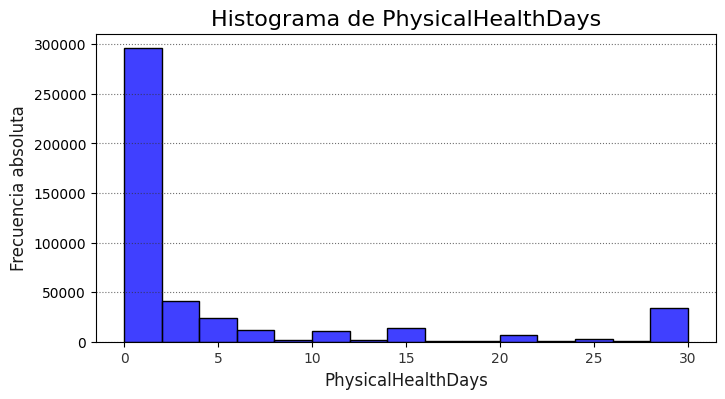

In [36]:
caracteristica= 'PhysicalHealthDays'
dib_histograma(caracteristica,df,15,hue=None)

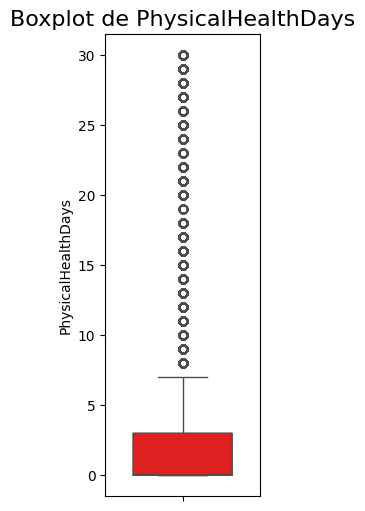

In [37]:
dib_boxplot(caracteristica,df)

####2.6.1.2 MentalHealthDays

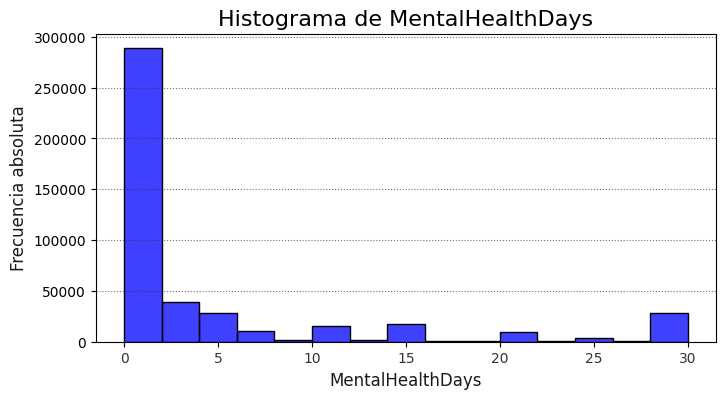

In [38]:
caracteristica= 'MentalHealthDays'
dib_histograma(caracteristica,df,15,hue=None)

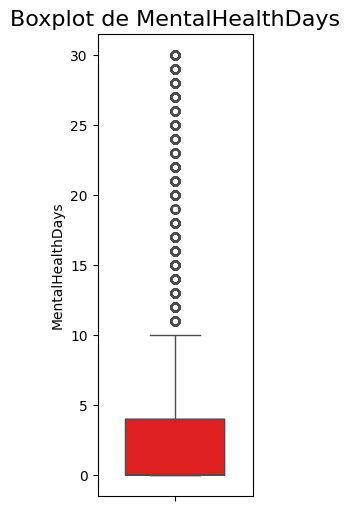

In [39]:
dib_boxplot(caracteristica,df)

####2.6.1.3 SleepHours

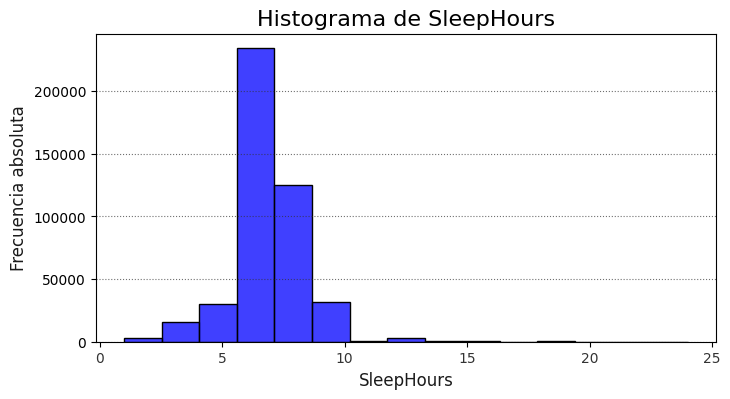

In [40]:
caracteristica= 'SleepHours'
dib_histograma(caracteristica,df,24,hue=None)

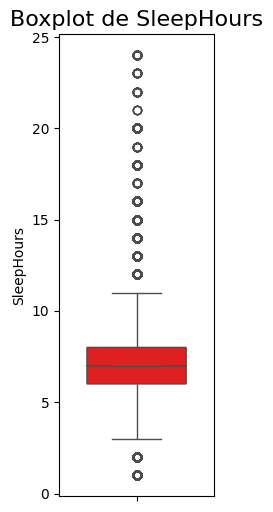

In [41]:
dib_boxplot(caracteristica,df)

####2.6.1.4 HeightInMeters

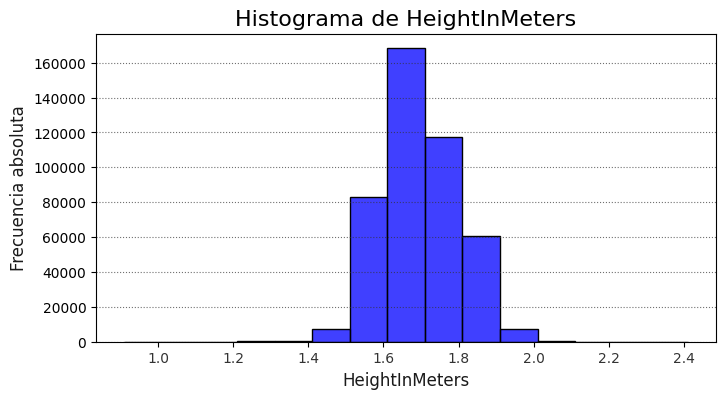

In [42]:
caracteristica= 'HeightInMeters'
dib_histograma(caracteristica,df,20,hue=None)

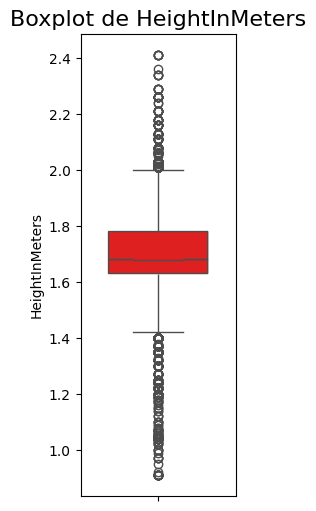

In [43]:
dib_boxplot(caracteristica,df)

####2.6.1.5 WeightInKilograms

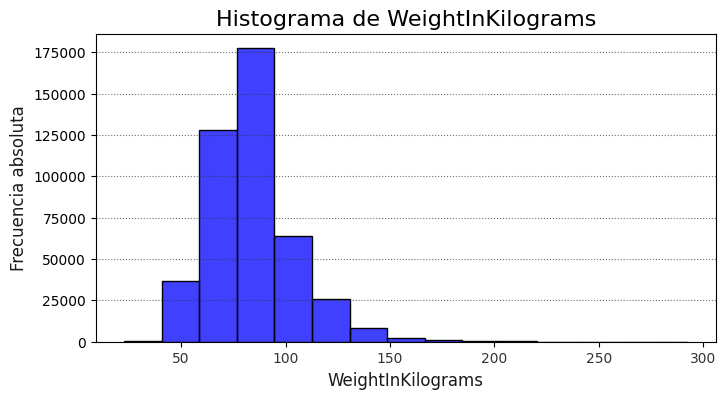

In [44]:
caracteristica= 'WeightInKilograms'
dib_histograma(caracteristica,df,20,hue=None)

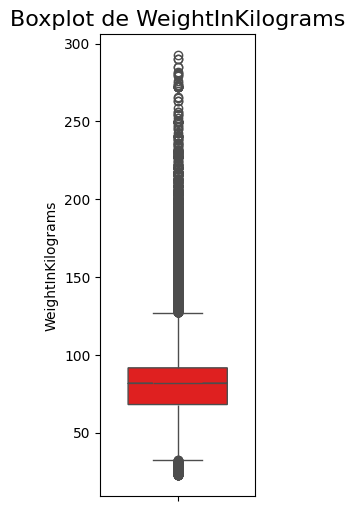

In [45]:
dib_boxplot(caracteristica,df)

####2.6.1.6 BMI

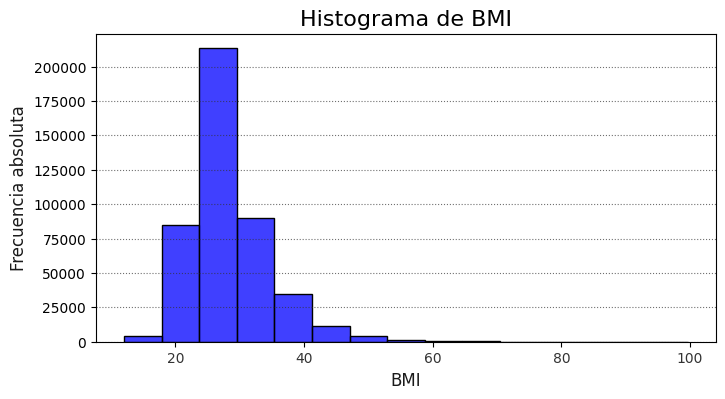

In [46]:
caracteristica= 'BMI'
dib_histograma(caracteristica,df,20,hue=None)

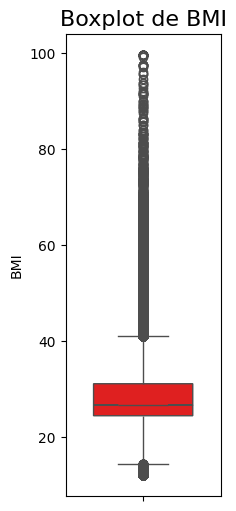

In [47]:
dib_boxplot(caracteristica,df)

###2.5.2 Características Ordinales

In [48]:
columnas_ordinales= ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory']

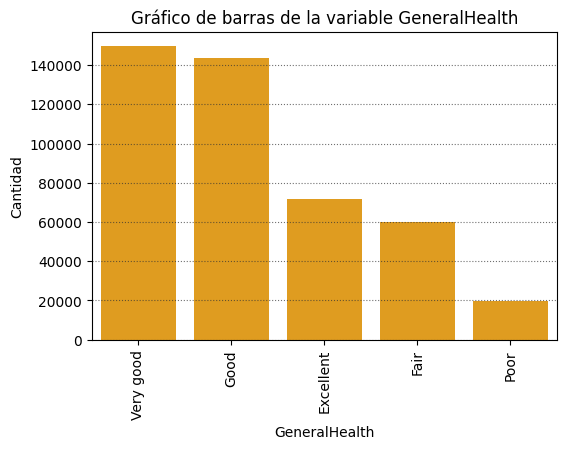

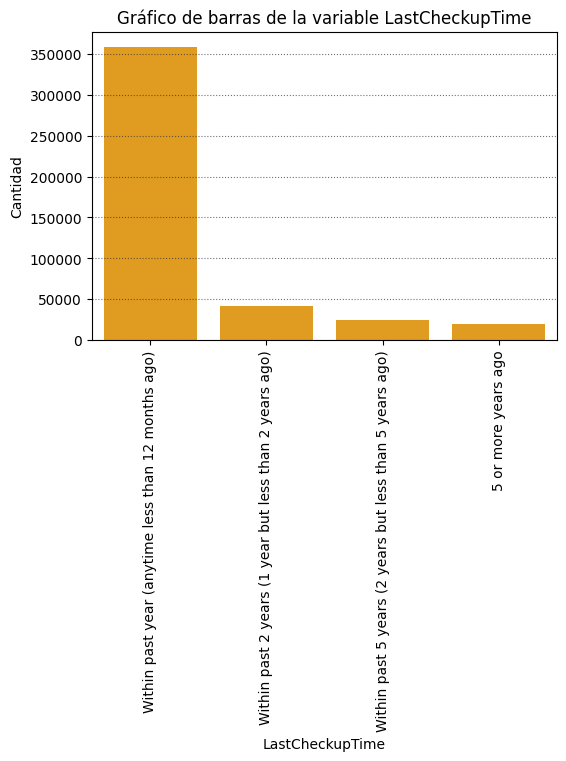

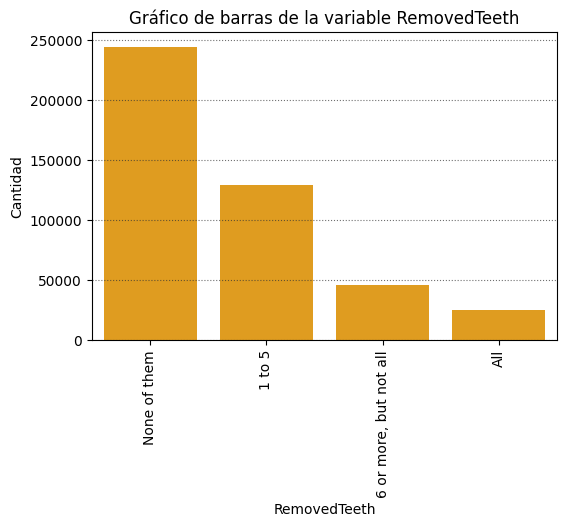

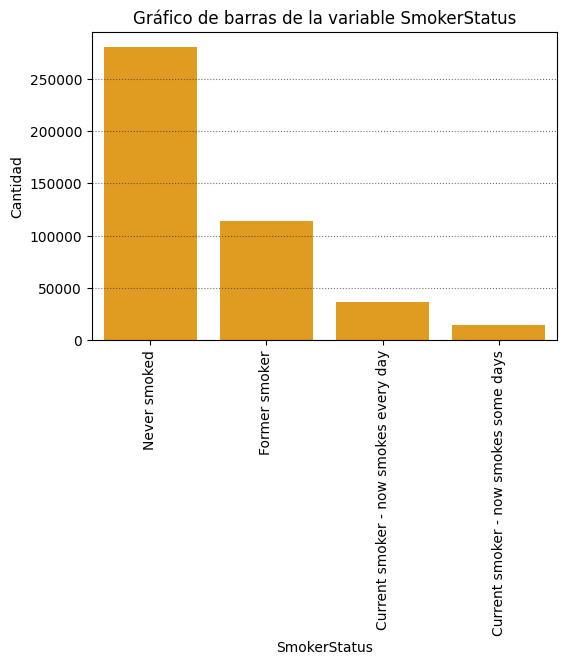

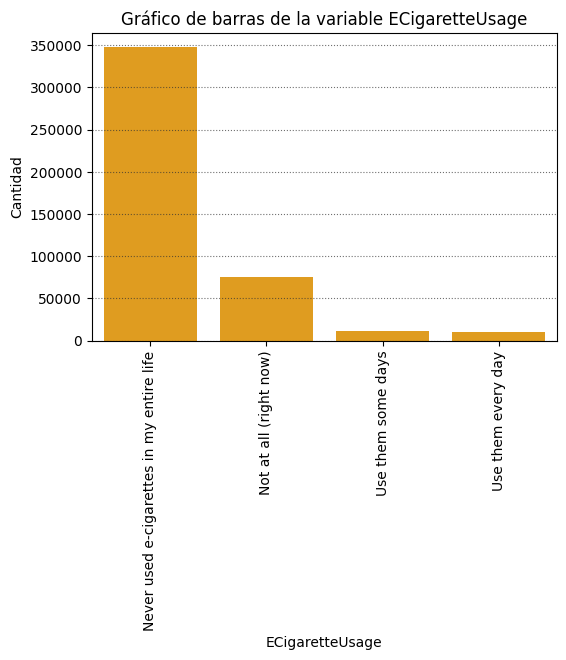

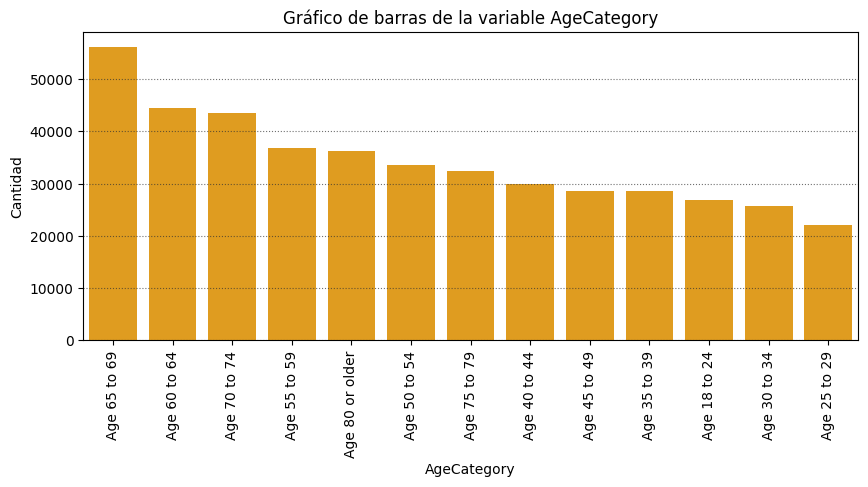

In [49]:
#Se realiza un gráfico de cada variable categórica ordinal
for columna in columnas_ordinales:
  dib_barplot(columna, df, color='orange')

###2.5.3 Características Nominales


Para obtener las columnas nominales y luego graficarlas, en primer lugar utilizamos el selector categórico generado previamente. Luego, obteniendo las columnas categóricas descontamos las columnas ordinales, lo que dará como resultado las columnas tipo nominal:

In [50]:
columnas_nominales= set(selector_cat(df)) - set(columnas_ordinales)

<ipython-input-35-d64f8c541585>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))


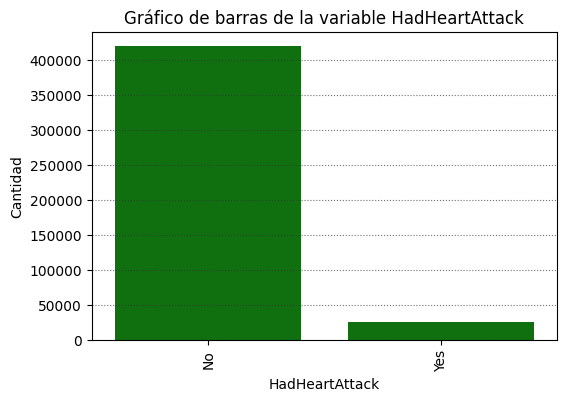

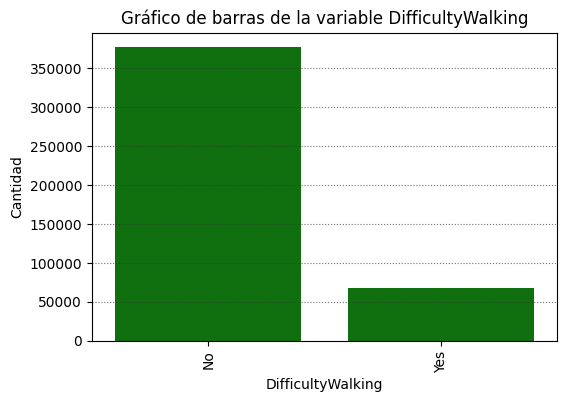

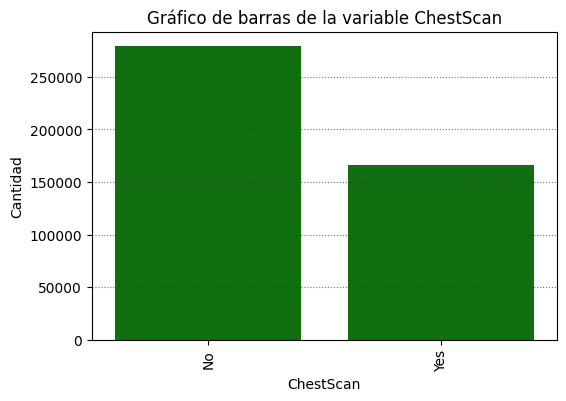

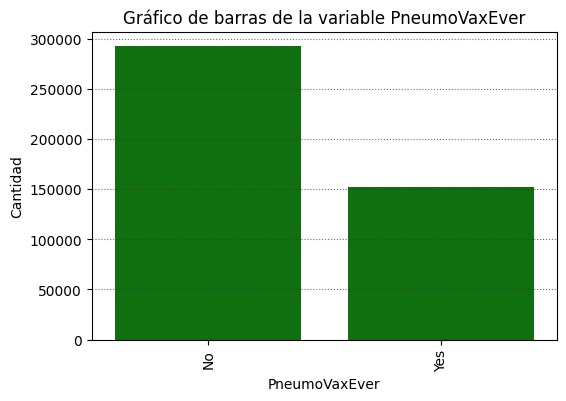

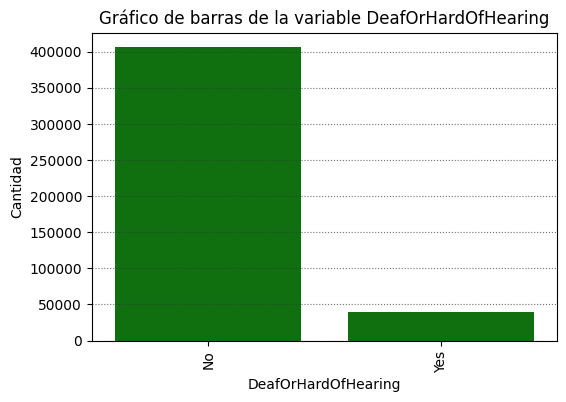

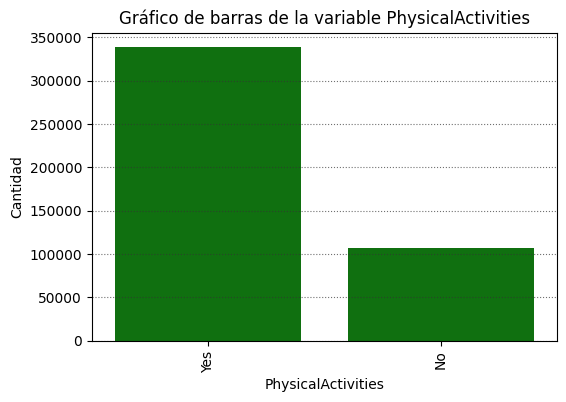

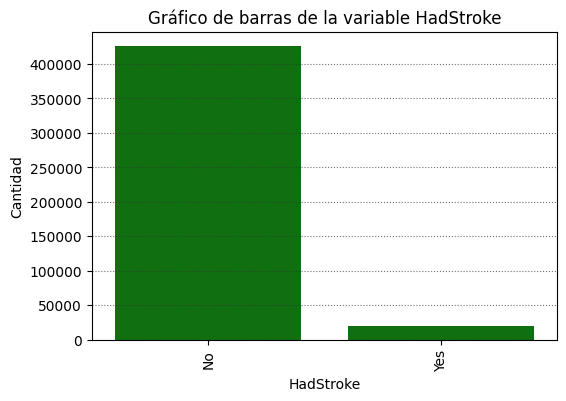

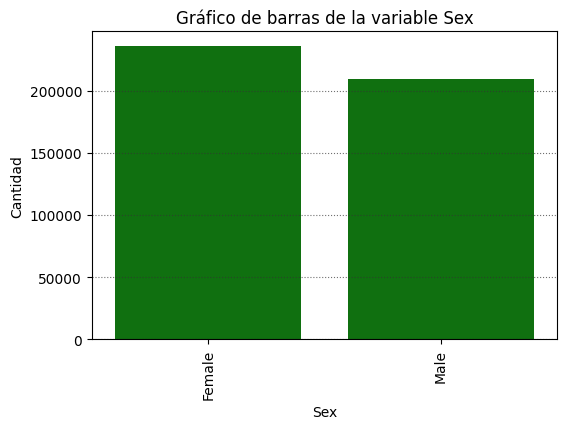

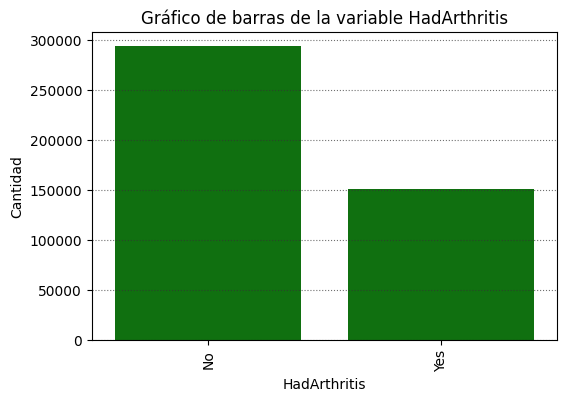

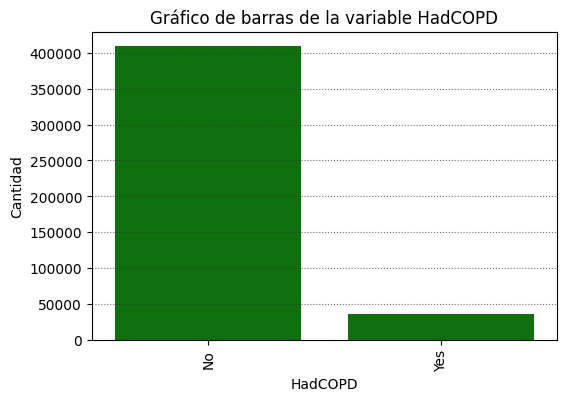

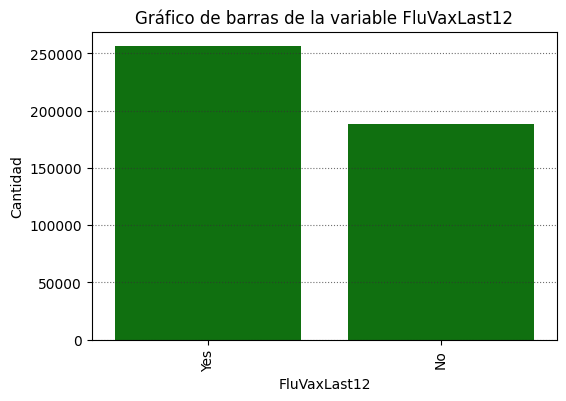

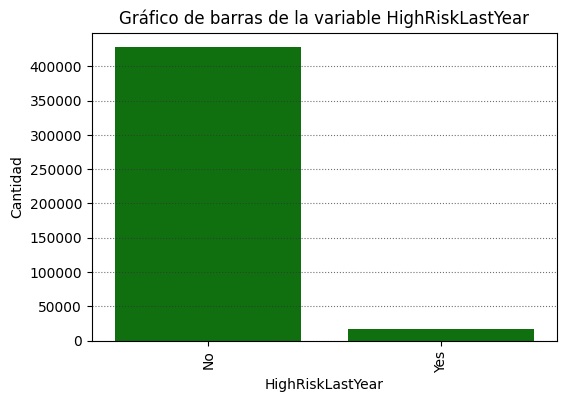

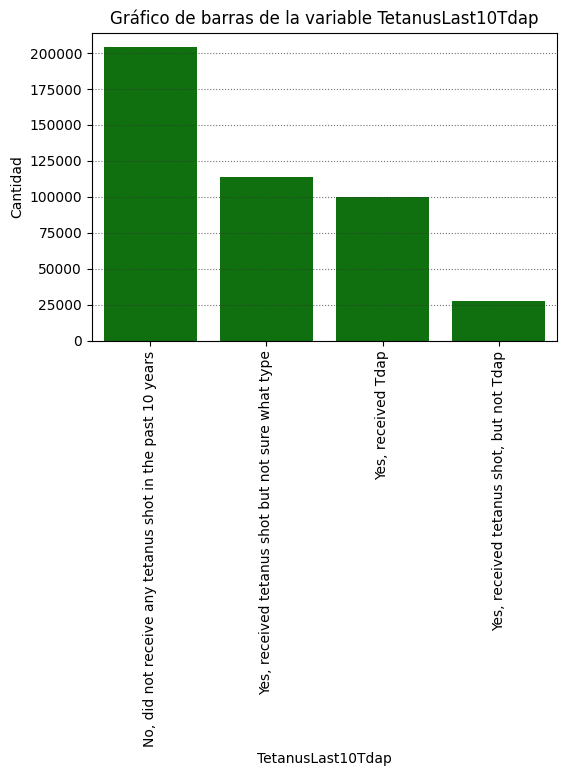

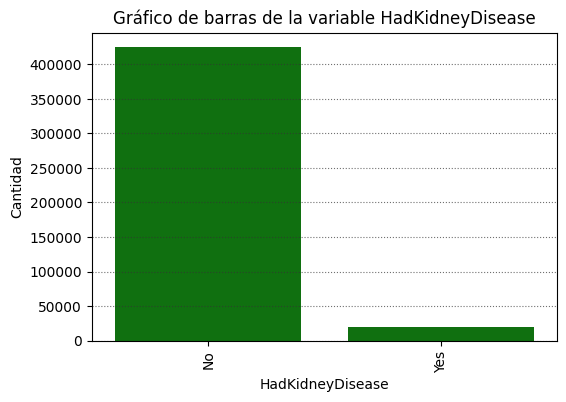

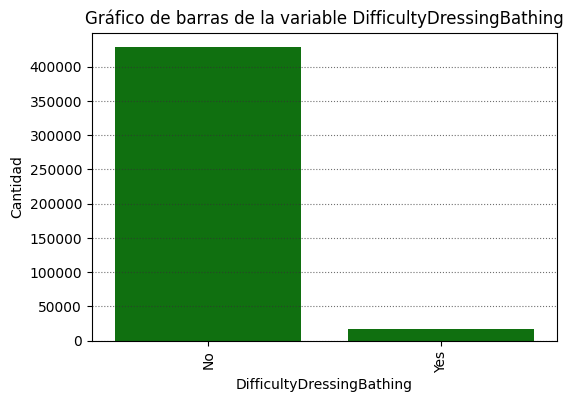

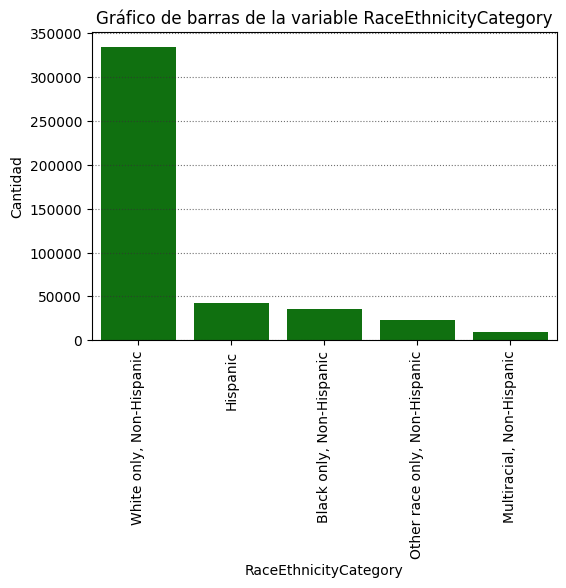

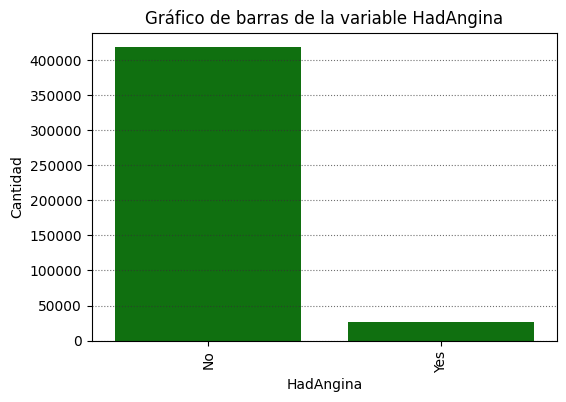

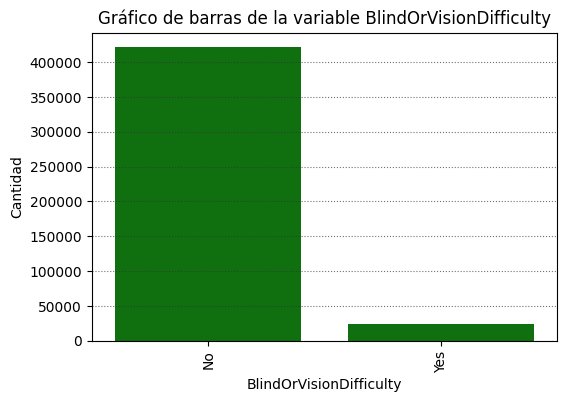

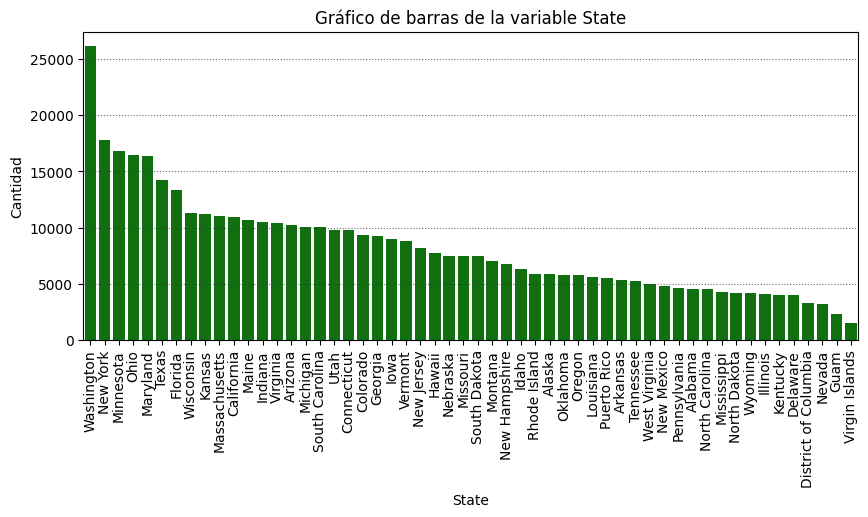

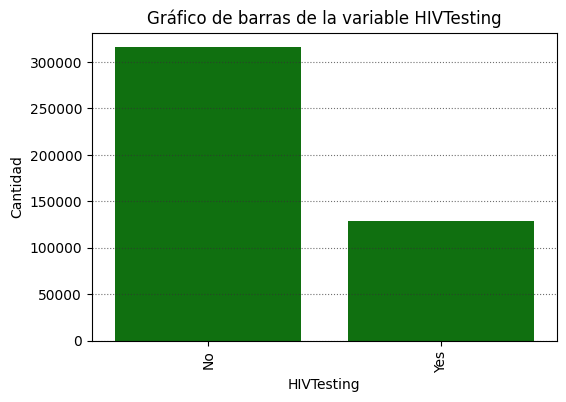

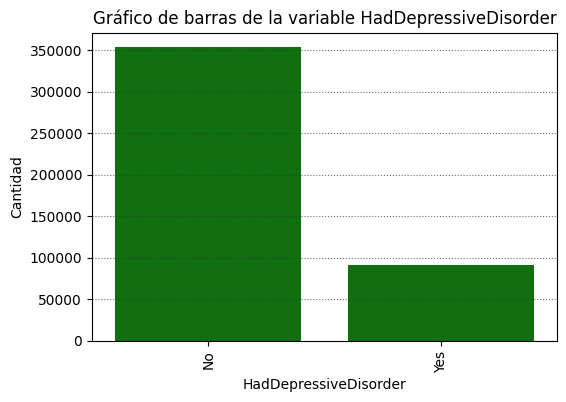

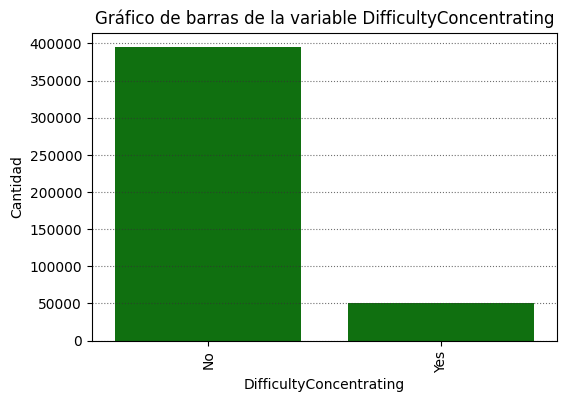

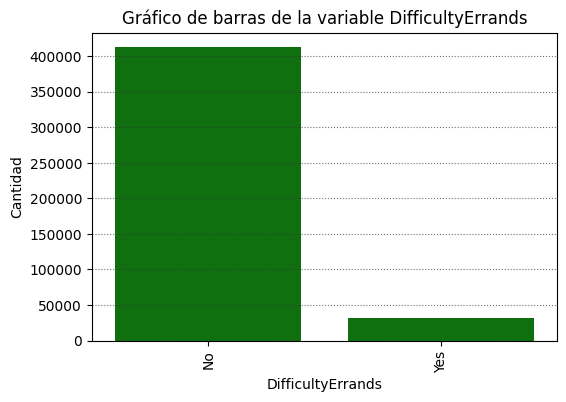

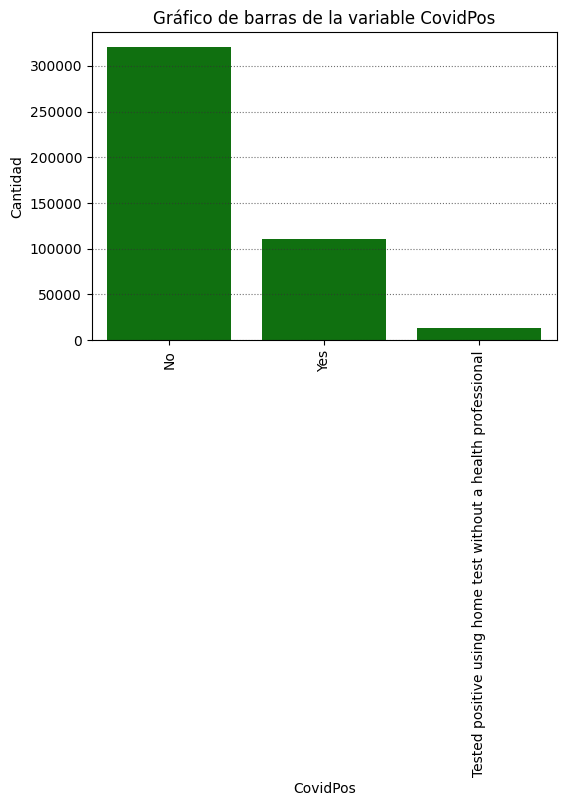

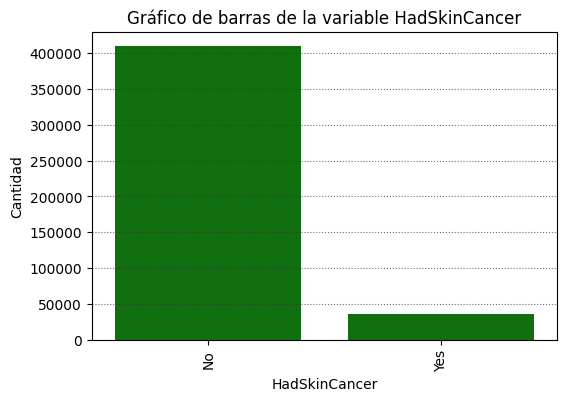

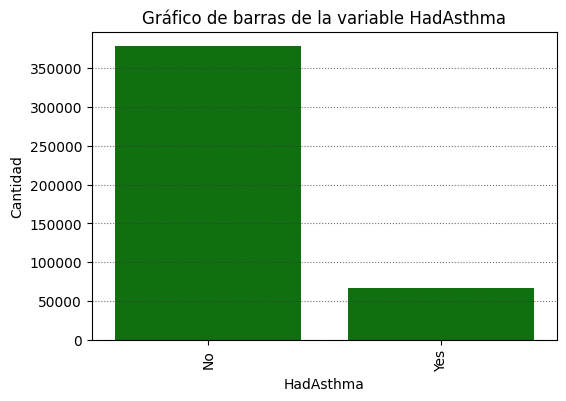

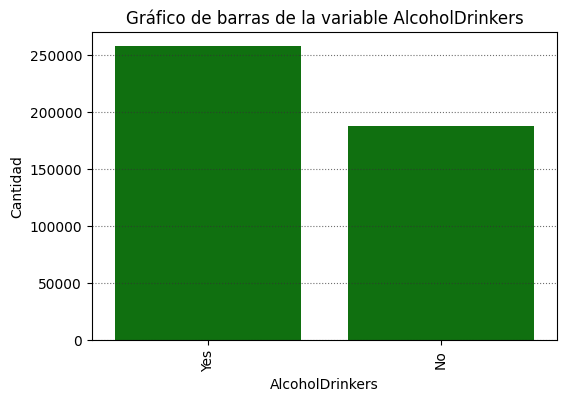

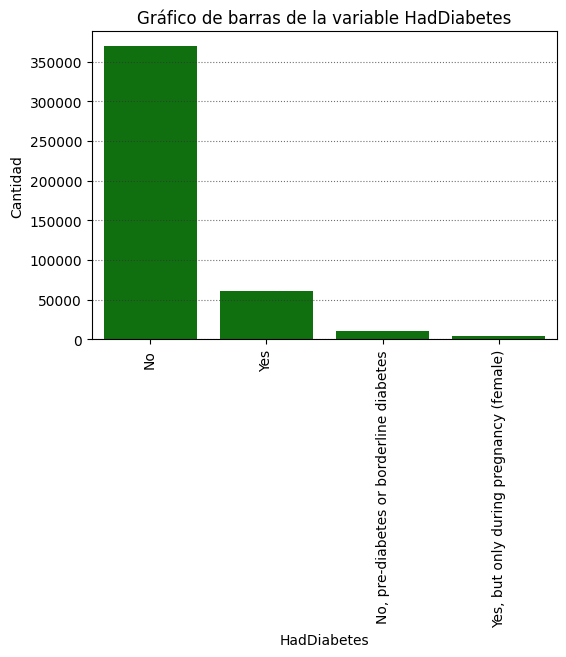

In [51]:
#Se realiza un gráfico de cada variable categórica nominal
for columna in columnas_nominales:
  dib_barplot(columna, df, color='green')

##2.6 Mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

Se extrae el target del DataFrame y se codifica:

In [52]:
y= df['HadHeartAttack']

In [53]:
y.value_counts(normalize=True)


HadHeartAttack
No     0.943574
Yes    0.056426
Name: proportion, dtype: float64

In [54]:
y= y.replace({'No':0, 'Yes':1})

In [55]:
df['HadHeartAttack'] = y

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

<Figure size 600x600 with 0 Axes>

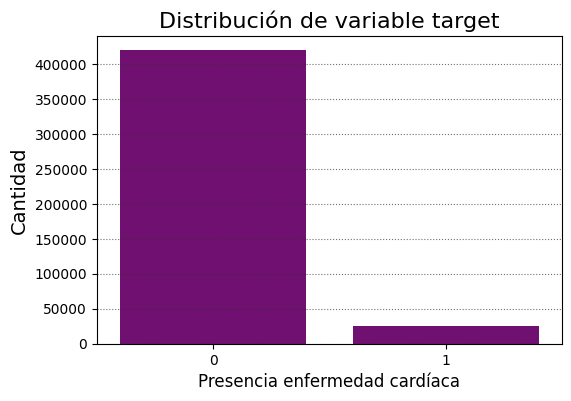

In [56]:
plt.figure(figsize=(6,6))
dib_barplot('HadHeartAttack', y, color='purple')
plt.title('Distribución de variable target', fontsize=16)
plt.ylabel('Cantidad', fontsize=14)
plt.xlabel('Presencia enfermedad cardíaca', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

In [57]:
correlación= df.corr(numeric_only=True)

Para determinar las mayores magnitudes de correlación, se grafica el heatmap con las correlaciones en valor absoluto:

<Axes: >

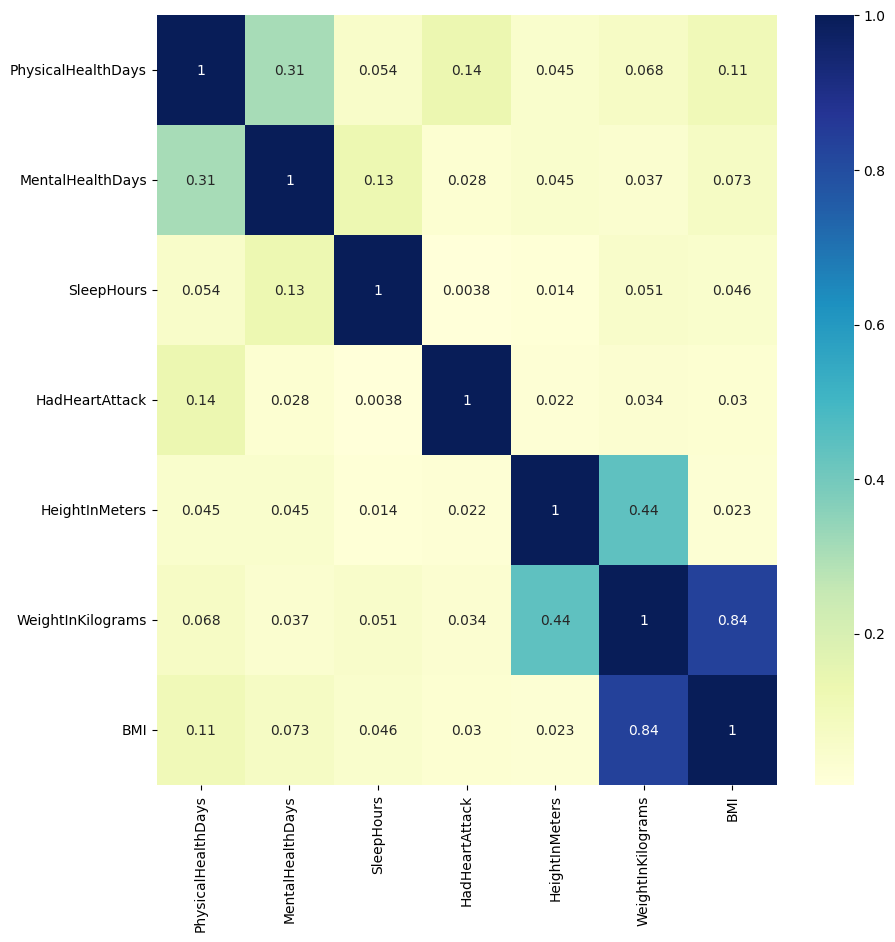

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(correlación), annot=True, cmap='YlGnBu')

- Las columnas que tienen las mayores correlaciones son GeneralHealth, AgeCategory, RemovedTeeth y PhysicalHealthDays. Las correlaciones en estas columnas van desdel 0.14 a 0.19

- La correlación más altan en los datos se produce entre las columnas WeightInKilograms y BMI, donde el valor llega a 0.86

- Correlaciones moderadas se dan entre PhysicalHealthDays y GeneralHealth (correlación igual a 0.5) y entre las columnas HeightInMeters con WeightInKilogram (correlación de 0.47)

##2.7 Gráficos de barras multivariantes

In [59]:
# Referencia: https://www.statology.org/seaborn-barplot-order/

def graficar_barras(variableX, variableY, df, hue=None):

  plt.style.use('tableau-colorblind10')

  # Si el gráfico es multivariado ('hue' no es igual a None), se cambia el tamaño de la figura
  # if hue == None:
  #   plt.figure(figsize=(8,4), facecolor='white')
  # else:
  #   plt.figure(figsize=(8,4), facecolor='white')

  # Se guarda el axe en caso de necesitar leyenda y moverlo
  ax =sns.barplot(data=df, x=variableX, y=variableY, hue=hue, saturation=1)

  # Título del gráfico
  titulo = f'Ventas totales agrupadas por {hue}'
  plt.title(titulo, fontsize=16)

  # Etiquetas de los ejes
  plt.xticks(c=(0.2,0.2,0.2))
  plt.xticks(c=(0.2,0.2,0.2))

  # Cuadricula
  plt.grid(axis='y', c=(0.2,0.2,0.2), alpha = 0.7, linestyle = 'dotted')

  # Títulos de los ejes
  plt.xlabel(variableX, fontsize=12, c=(0.1,0.1,0.1))
  plt.ylabel(variableY, fontsize=12, c=(0.1,0.1,0.1))

  # Comando para agregar leyenda
  # https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
  # plt.legend(title='Tipo de Outlet')

  # Graficar leyenda si es que el parámetro 'hue' es distinto de None
  # Referencia : https://seaborn.pydata.org/generated/seaborn.move_legend.html
  if hue != None:
    sns.move_legend(ax, loc=(1.01, 0.5))

###2.7.1 Agrupación por fumadores y sexo

In [60]:
df.groupby(['SmokerStatus', 'Sex'])[['HadHeartAttack']].mean()*100

HadHeartAttack
SmokerStatus                          Sex                   
Current smoker - now smokes every day Female        6.885300
                                      Male         10.786228
Current smoker - now smokes some days Female        6.098682
                                      Male          7.825148
Former smoker                         Female        5.726401
                                      Male         11.182785
Never smoked                          Female        3.148272
                                      Male          5.026149

In [61]:
df.groupby(['SmokerStatus', 'Sex'])[['HadHeartAttack']].sum()

HadHeartAttack
SmokerStatus                          Sex                   
Current smoker - now smokes every day Female            1245
                                      Male              1933
Current smoker - now smokes some days Female             398
                                      Male               580
Former smoker                         Female            3106
                                      Male              6657
Never smoked                          Female            4942
                                      Male              6247

In [62]:
df.groupby(['SmokerStatus','Sex'])[['HadHeartAttack']].count()

HadHeartAttack
SmokerStatus                          Sex                   
Current smoker - now smokes every day Female           18082
                                      Male             17921
Current smoker - now smokes some days Female            6526
                                      Male              7412
Former smoker                         Female           54240
                                      Male             59529
Never smoked                          Female          156975
                                      Male            124290

In [63]:
df.groupby(['SmokerStatus'])[['HadHeartAttack']].sum()*100/df.groupby(['SmokerStatus'])[['HadHeartAttack']].count()


,HadHeartAttack
SmokerStatus,
Current smoker - now smokes every day,8.827042
Current smoker - now smokes some days,7.016789
Former smoker,8.581424
Never smoked,3.978099


In [64]:
agrupacion_smoker_sex= df.groupby(['SmokerStatus','Sex'])[['HadHeartAttack']].sum()*100/df.groupby(['SmokerStatus','Sex'])[['HadHeartAttack']].count()

In [65]:
agrupacion_smoker_sex

HadHeartAttack
SmokerStatus                          Sex                   
Current smoker - now smokes every day Female        6.885300
                                      Male         10.786228
Current smoker - now smokes some days Female        6.098682
                                      Male          7.825148
Former smoker                         Female        5.726401
                                      Male         11.182785
Never smoked                          Female        3.148272
                                      Male          5.026149

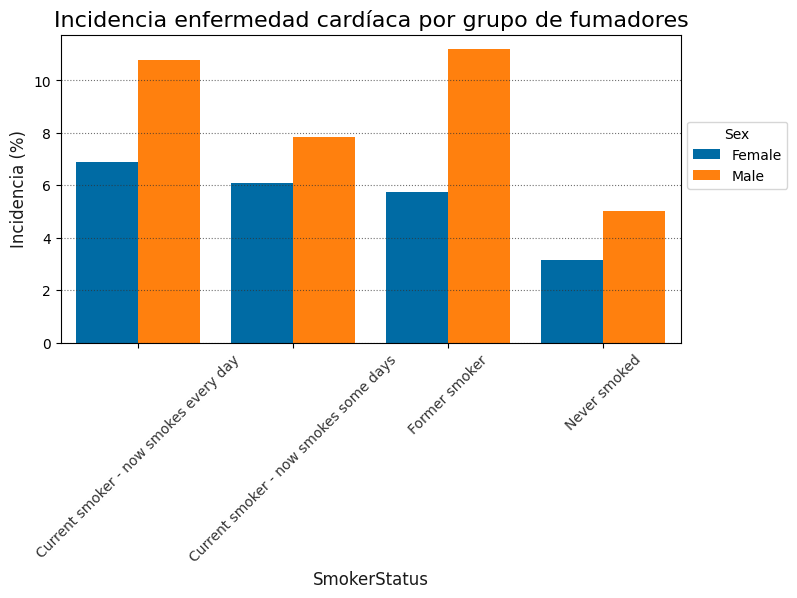

In [66]:
plt.figure(figsize=(8,4))
graficar_barras('SmokerStatus','HadHeartAttack', agrupacion_smoker_sex, 'Sex')
plt.title('Incidencia enfermedad cardíaca por grupo de fumadores', fontsize=16)
plt.ylabel('Incidencia (%)')
plt.xticks(rotation=45, fontsize=10)

plt.savefig('IncidenciaFumadoresSexo.png')

###2.7.2 Agrupación por dientes removidos y sexo

In [67]:
agrupacion_removedteeth_sex= df.groupby(['RemovedTeeth','Sex'])[['HadHeartAttack']].sum()*100/df.groupby(['RemovedTeeth','Sex'])[['HadHeartAttack']].count()
# agrupacion_removedteeth_sex

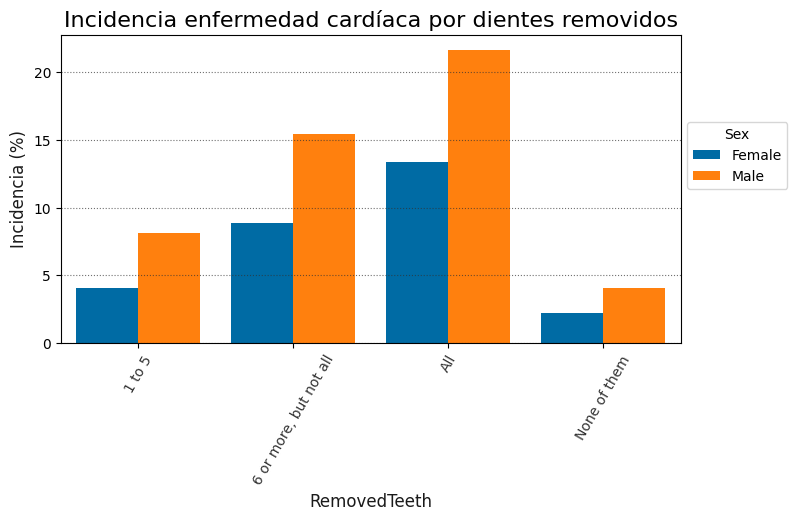

In [68]:
plt.figure(figsize=(8,4))
graficar_barras('RemovedTeeth','HadHeartAttack', agrupacion_removedteeth_sex, 'Sex')
plt.title('Incidencia enfermedad cardíaca por dientes removidos', fontsize=16)
plt.ylabel('Incidencia (%)')
plt.xticks(rotation=60, fontsize=10)
#plt.tight_layout()
plt.savefig('IncidenciaDientesSexo.png')

###2.7.3 Agrupación por AgeCategory y sexo

In [69]:
agrupacion_age_sex= df.groupby(['AgeCategory','Sex'])[['HadHeartAttack']].sum()*100/df.groupby(['AgeCategory','Sex'])[['HadHeartAttack']].count()
# agrupacion_age_sex

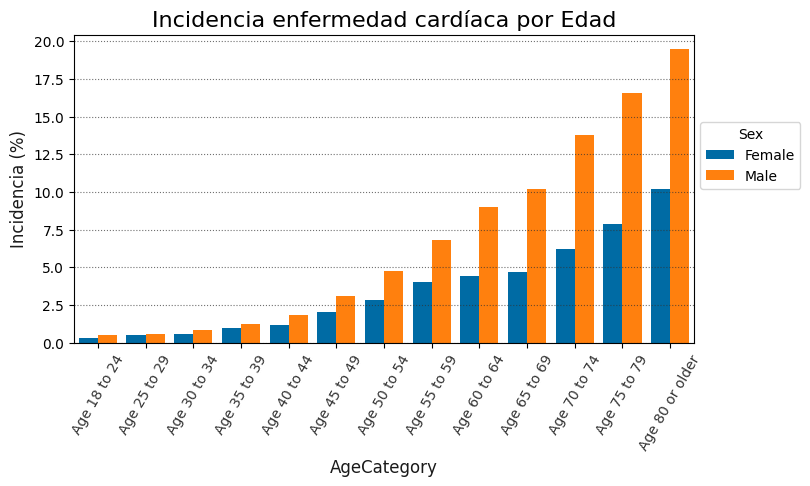

In [70]:
plt.figure(figsize=(8,4))
graficar_barras('AgeCategory','HadHeartAttack', agrupacion_age_sex, 'Sex')
plt.title('Incidencia enfermedad cardíaca por Edad', fontsize=16)
plt.ylabel('Incidencia (%)')
plt.xticks(rotation=60, fontsize=10)
#plt.tight_layout()
plt.savefig('IncidenciaEdadSexo.png')

###2.7.4 Agrupación por AgeCategory y RemovedTeeth

In [71]:
agrupacion_age_removed= df.groupby(['AgeCategory','RemovedTeeth'])[['HadHeartAttack']].sum()*100/df.groupby(['AgeCategory','RemovedTeeth'])[['HadHeartAttack']].count()
# agrupacion_age_removed

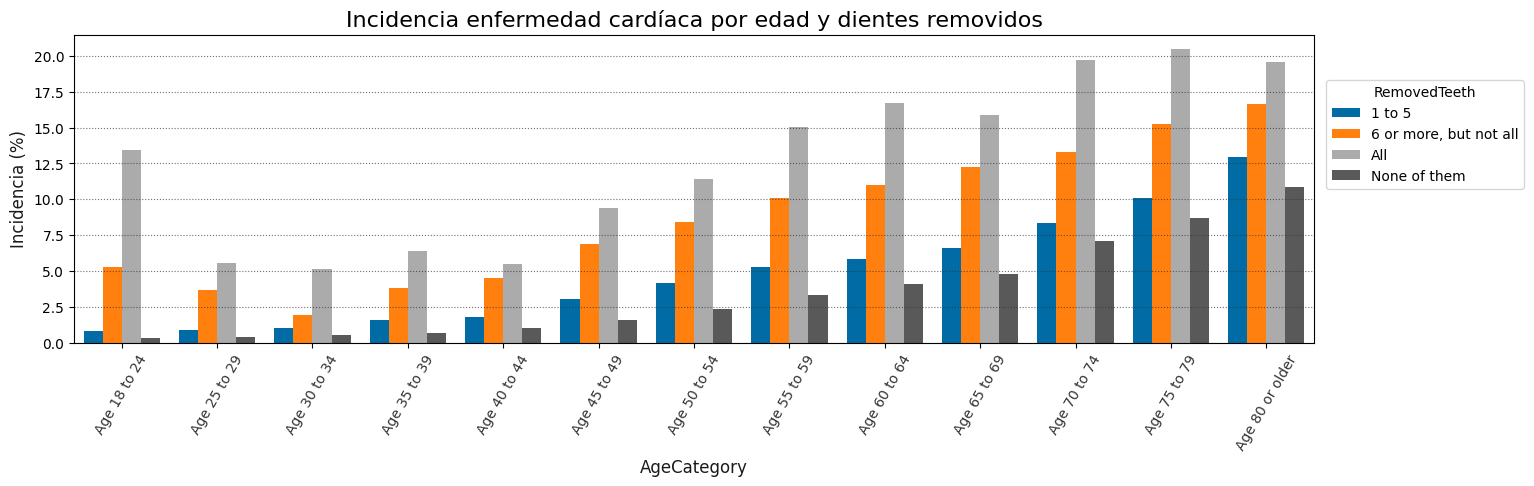

In [72]:
plt.figure(figsize=(16,4))
graficar_barras('AgeCategory','HadHeartAttack', agrupacion_age_removed, 'RemovedTeeth')
plt.title('Incidencia enfermedad cardíaca por edad y dientes removidos', fontsize=16)
plt.ylabel('Incidencia (%)')
plt.xticks(rotation=60, fontsize=10)
#plt.tight_layout()
plt.savefig('IncidenciaEdadRemoved.png')

#3 Preprocesamiento de Datos

Como se verá más adelante, se ejecutarán pruebas sobre diversos tipos de modelos de aprendizaje automático. Con la finalidad de mejorar las métricas de desempeño, se realizarán diversos tratamientos de los datos

Se procede a codificar numéricamente a la columnas ordinales:

In [73]:
dicc_gh = {'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}

In [74]:
dicc_lct= {'Within past year (anytime less than 12 months ago)':0,
           'Within past 2 years (1 year but less than 2 years ago)':1,
           'Within past 5 years (2 years but less than 5 years ago)':2,
           '5 or more years ago':3}

In [75]:
dicc_rt= {'None of them':0, '1 to 5':1, '6 or more, but not all':2, 'All':3}

In [76]:
# Analizar bien si esta columna puede ser tratada como nominal u ordinal
dicc_ss= {'Never smoked':0, 'Former smoker':1, 'Current smoker - now smokes some days':2, 'Current smoker - now smokes every day':3  }

In [77]:
dicc_ecu= {'Never used e-cigarettes in my entire life':0, 'Not at all (right now)':1, 'Use them some days':2, 'Use them every day':3}

In [78]:
dicc_ac= {'Age 18 to 24': 0,
          'Age 25 to 29': 1,
          'Age 30 to 34': 2,
          'Age 35 to 39': 3,
          'Age 40 to 44': 4,
          'Age 45 to 49': 5,
          'Age 50 to 54': 6,
          'Age 55 to 59': 7,
          'Age 60 to 64': 8,
          'Age 65 to 69': 9,
          'Age 70 to 74': 10,
          'Age 75 to 79': 11,
          'Age 80 or older': 12}

Conversión de variables nominales:

In [79]:
# Pendiente: si bien no habría fuga de datos, hay que separar la transformación en datos de entrenamiento y de pruebas
df['GeneralHealth']= df['GeneralHealth'].replace(dicc_gh)
df['LastCheckupTime']= df['LastCheckupTime'].replace(dicc_lct)
df['RemovedTeeth']= df['RemovedTeeth'].replace(dicc_rt)
df['SmokerStatus']= df['SmokerStatus'].replace(dicc_ss)
df['ECigaretteUsage']= df['ECigaretteUsage'].replace(dicc_ecu)
df['AgeCategory']= df['AgeCategory'].replace(dicc_ac)

In [80]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

Se aplicarán distintos tipos de preprocesamiento de datos para ver como afectan en las predicciones de los modelos:

- **X1,y1:** Preprocesamiento donde se eliminan datos faltantes, sin tratamiento de outliers y sin escalamiento

- **X2,y2:** Preprocesamiento donde se eliminan datos faltantes, sin tratamiento de outliers, con escalamiento

- **X3,y3:** Preprocesamiento donde se eliminan datos faltantes, con tratamiento de outliers, sin escalamiento

- **X4,y4:** Preprocesamiento donde se eliminan datos faltantes, con tratamiento de outliers y con escalamiento

- **X5,y5:** Preprocesamiento donde se imputan datos faltantes, sin tratamiento de outliers y sin escalamiento

- **X6,y6:** Preprocesamiento donde se imputan datos faltantes, sin tratamiento de outliers, con escalamiento

- **X7,y7:** Preprocesamiento donde se imputan datos faltantes, con tratamiento de outliers, sin escalamiento

- **X8,y8:** Preprocesamiento donde se imputan datos faltantes, con tratamiento de outliers y con escalamiento



In [81]:
y= df['HadHeartAttack']
X= df.drop('HadHeartAttack', axis=1)

En primer lugar, se eliminan datos donde el target es nulo

In [82]:
X=X[y.notna()]

In [83]:
y= y[y.notna()]

##Tratamiento target

In [84]:
y= y.replace({'No':0, 'Yes':1})

##Tratamiento de columnas ordinales

In [85]:
columnas_ordinales= ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory']

In [86]:
dicc_gh = {'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}

In [87]:
dicc_lct= {'Within past year (anytime less than 12 months ago)':0,
           'Within past 2 years (1 year but less than 2 years ago)':1,
           'Within past 5 years (2 years but less than 5 years ago)':2,
           '5 or more years ago':3}

In [88]:
dicc_rt= {'None of them':0, '1 to 5':1, '6 or more, but not all':2, 'All':3}

In [89]:
dicc_ss= {'Never smoked':0, 'Former smoker':1, 'Current smoker - now smokes some days':2, 'Current smoker - now smokes every day':3  }

In [90]:
dicc_ecu= {'Never used e-cigarettes in my entire life':0, 'Not at all (right now)':1, 'Use them some days':2, 'Use them every day':3}

In [91]:
dicc_ac= {'Age 18 to 24': 0,
          'Age 25 to 29': 1,
          'Age 30 to 34': 2,
          'Age 35 to 39': 3,
          'Age 40 to 44': 4,
          'Age 45 to 49': 5,
          'Age 50 to 54': 6,
          'Age 55 to 59': 7,
          'Age 60 to 64': 8,
          'Age 65 to 69': 9,
          'Age 70 to 74': 10,
          'Age 75 to 79': 11,
          'Age 80 or older': 12}

Conversión de variables nominales:

In [92]:
X['GeneralHealth']= X['GeneralHealth'].replace(dicc_gh)
X['LastCheckupTime']= X['LastCheckupTime'].replace(dicc_lct)
X['RemovedTeeth']= X['RemovedTeeth'].replace(dicc_rt)
X['SmokerStatus']= X['SmokerStatus'].replace(dicc_ss)
X['ECigaretteUsage']= X['ECigaretteUsage'].replace(dicc_ecu)
X['AgeCategory']= X['AgeCategory'].replace(dicc_ac)

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              444975 non-null  int64  
 3   PhysicalHealthDays         444975 non-null  float64
 4   MentalHealthDays           444975 non-null  float64
 5   LastCheckupTime            444975 non-null  int64  
 6   PhysicalActivities         444975 non-null  object 
 7   SleepHours                 444975 non-null  float64
 8   RemovedTeeth               444975 non-null  int64  
 9   HadAngina                  444975 non-null  object 
 10  HadStroke                  444975 non-null  object 
 11  HadAsthma                  444975 non-null  object 
 12  HadSkinCancer              444975 non-null  object 
 13  HadCOPD                    444975 

## Selectores de columnas

In [94]:
col_num = make_column_selector(dtype_include='number')
col_cat = make_column_selector(dtype_include='object')

## Preprocesadores

In [95]:
ohe= OneHotEncoder(handle_unknown='ignore')
scaler= StandardScaler()
imputer_cat= SimpleImputer(strategy='most_frequent')
imputer_num= SimpleImputer(strategy='median')

##Pipelines

In [96]:
pipeline_cat = make_pipeline(imputer_cat, ohe)

In [97]:
pipeline_num= make_pipeline(imputer_num, scaler)

#División train-test

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [100]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [101]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [102]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [103]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [104]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [105]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [106]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X,y,test_size=0.2, random_state=42)


##Función para tratamiento de outliers
En cada columna que se aplica, los outliers se ajustan al mínimo y al máximo del criterio bolxplot (no se eliminan valores)

In [107]:
def tratamiento_outliers_train(columna_original):
  # Se crea una copia de la columna para evitar SettingWithCopyWarning
  # Referencia: https://saturncloud.io/blog/pandas-warning-when-using-map-a-value-is-trying-to-be-set-on-a-copy-of-a-slice-from-a-dataframe/
  columna = columna_original.copy()

  q_75= columna.quantile(0.75)
  q_25= columna.quantile(0.25)
  IQR= q_75 - q_25
  minimo= q_25 - 1.5*IQR
  maximo= q_75 + 1.5*IQR
  columna.loc[columna > maximo]= maximo
  columna.loc[columna < minimo]= minimo
  return columna

In [108]:
def tratamiento_outliers_test(datos_train, datos_test_original):
  minimo= datos_train.min()
  maximo= datos_train.max()

  # Se crea una copia de la columna para evitar SettingWithCopyWarning
  # Referencia: https://saturncloud.io/blog/pandas-warning-when-using-map-a-value-is-trying-to-be-set-on-a-copy-of-a-slice-from-a-dataframe/
  datos_test=datos_test_original.copy()

  datos_test.loc[datos_test > maximo]= maximo
  datos_test.loc[datos_test < minimo]= minimo
  return datos_test

##3.1 Preprocesamiento donde se eliminan datos faltantes, sin tratamiento de outliers y sin escalamiento

In [109]:
# Total de filas que tienen al menos un valor nulo
X1_train.isnull().any(axis=1).sum()

0

In [110]:
# Filas que tengan al menos 1 valor nulo
filtro_na_train= X1_train.isna().any(axis=1)
filtro_na_test= X1_test.isna().any(axis=1)

In [111]:
X1_train= X1_train[~filtro_na_train]
y1_train= y1_train[~filtro_na_train]

In [112]:
# Se verifica que no queden filas con al menos 1 valor nulo
X1_train.isnull().any(axis=1).sum()

0

In [113]:
# Total de filas que tienen al menos un valor nulo
X1_test.isnull().any(axis=1).sum()

0

In [114]:
X1_test= X1_test[~filtro_na_test]
y1_test= y1_test[~filtro_na_test]

In [115]:
# Se verifica que no queden filas con al menos 1 valor nulo
X1_test.isnull().any(axis=1).sum()

0

##Antes de aplicar OneHotEncoder, se guardan copias ya que son requeridas más adelante

In [116]:
X2_train, X2_test, y2_train, y2_test = X1_train, X1_test, y1_train, y1_test

In [117]:
X3_train, X3_test, y3_train, y3_test= X1_train, X1_test, y1_train, y1_test

In [118]:
X4_train, X4_test, y4_train, y4_test= X1_train, X1_test, y1_train, y1_test

##Se aplica One Hot Encoding

In [119]:
pipeline_ohe= make_column_transformer((ohe, col_cat), remainder='passthrough')

In [120]:
pipeline_ohe.fit(X1_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25c00>)])

In [121]:
X1_train= pipeline_ohe.transform(X1_train)

In [122]:
X1_test= pipeline_ohe.transform(X1_test)

##3.2 Preprocesamiento donde se eliminan datos faltantes, sin tratamiento de outliers, con escalamiento

In [123]:
pipeline_ohe_scaler= make_column_transformer((ohe, col_cat), (scaler, col_num), remainder='passthrough')

In [124]:
pipeline_ohe_scaler.fit(X2_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25c00>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25ae0>)])

In [125]:
X2_train= pipeline_ohe_scaler.transform(X2_train)

In [126]:
X2_test= pipeline_ohe_scaler.transform(X2_test)

##3.3 Preprocesamiento donde se eliminan datos faltantes, con tratamiento de outliers, sin escalamiento

In [127]:
X3_train['HeightInMeters']= tratamiento_outliers_train(X3_train['HeightInMeters'])

In [128]:
X3_train['WeightInKilograms']= tratamiento_outliers_train(X3_train['WeightInKilograms'])

In [129]:
X3_train['BMI']= tratamiento_outliers_train(X3_train['BMI'])

In [130]:
X3_test['HeightInMeters']= tratamiento_outliers_test(X3_train['HeightInMeters'],X3_test['HeightInMeters'])

In [131]:
X3_test['WeightInKilograms']= tratamiento_outliers_test(X3_train['WeightInKilograms'],X3_test['WeightInKilograms'])

In [132]:
X3_test['BMI']= tratamiento_outliers_test(X3_train['BMI'],X3_test['BMI'])

In [133]:
pipeline_ohe= make_column_transformer((ohe, col_cat), remainder='passthrough')

In [134]:
pipeline_ohe.fit(X3_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25c00>)])

In [135]:
X3_train= pipeline_ohe.transform(X3_train)

In [136]:
X3_test= pipeline_ohe.transform(X3_test)

##3.4 Preprocesamiento donde se eliminan datos faltantes, con tratamiento de outliers y con escalamiento


In [137]:
X4_train['HeightInMeters']= tratamiento_outliers_train(X4_train['HeightInMeters'])

In [138]:
X4_train['WeightInKilograms']= tratamiento_outliers_train(X4_train['WeightInKilograms'])

In [139]:
X4_train['BMI']= tratamiento_outliers_train(X4_train['BMI'])

In [140]:
X4_test['HeightInMeters']= tratamiento_outliers_test(X4_train['HeightInMeters'],X4_test['HeightInMeters'])

In [141]:
X4_test['WeightInKilograms']= tratamiento_outliers_test(X4_train['WeightInKilograms'],X4_test['WeightInKilograms'])

In [142]:
X4_test['BMI']= tratamiento_outliers_test(X4_train['BMI'],X4_test['BMI'])

In [143]:
pipeline_ohe_scaler= make_column_transformer((ohe, col_cat), (scaler, col_num), remainder='passthrough')

In [144]:
pipeline_ohe_scaler.fit(X4_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25c00>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25ae0>)])

In [145]:
X4_train= pipeline_ohe_scaler.transform(X4_train)

In [146]:
X4_test= pipeline_ohe_scaler.transform(X4_test)

##3.5 Preprocesamiento donde se imputan datos faltantes, sin tratamiento de outliers y sin escalamiento

In [147]:
pipeline_imputer_ohe= make_column_transformer((pipeline_cat, col_cat),(imputer_num, col_num), remainder='passthrough')

In [148]:
pipeline_imputer_ohe.fit(X5_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25c00>),
                                ('simpleimputer',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25ae0>)])

In [149]:
X5_train = pipeline_imputer_ohe.transform(X5_train)

In [150]:
X5_test = pipeline_imputer_ohe.transform(X5_test)

##3.6 Preprocesamiento donde se imputan datos faltantes, sin tratamiento de outliers, con escalamiento

In [151]:
pipeline_imputer_ohe_scaler= make_column_transformer((pipeline_cat, col_cat),(pipeline_num, col_num), remainder='passthrough')

In [152]:
pipeline_imputer_ohe_scaler.fit(X6_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25c00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25ae0>)])

In [153]:
X6_train= pipeline_imputer_ohe_scaler.transform(X6_train)

In [154]:
X6_test= pipeline_imputer_ohe_scaler.transform(X6_test)

##3.7 Preprocesamiento donde se imputan datos faltantes, con tratamiento de outliers, sin escalamiento

In [155]:
X7_train['HeightInMeters']= tratamiento_outliers_train(X7_train['HeightInMeters'])

In [156]:
X7_train['WeightInKilograms']= tratamiento_outliers_train(X7_train['WeightInKilograms'])

In [157]:
X7_train['BMI']= tratamiento_outliers_train(X7_train['BMI'])

In [158]:
X7_test['HeightInMeters']= tratamiento_outliers_test(X7_train['HeightInMeters'],X7_test['HeightInMeters'])

In [159]:
X7_test['WeightInKilograms']= tratamiento_outliers_test(X7_train['WeightInKilograms'],X7_test['WeightInKilograms'])

In [160]:
X7_test['BMI']= tratamiento_outliers_test(X7_train['BMI'],X7_test['BMI'])

In [161]:
pipeline_imputer_ohe= make_column_transformer((pipeline_cat, col_cat),(imputer_num, col_num), remainder='passthrough')

In [162]:
pipeline_imputer_ohe.fit(X7_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25c00>),
                                ('simpleimputer',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25ae0>)])

In [163]:
X7_train= pipeline_imputer_ohe.transform(X7_train)

In [164]:
X7_test= pipeline_imputer_ohe.transform(X7_test)

##3.8 Preprocesamiento donde se imputan datos faltantes, con tratamiento de outliers y con escalamiento

In [165]:
X8_train['HeightInMeters']= tratamiento_outliers_train(X8_train['HeightInMeters'])

In [166]:
X8_train['WeightInKilograms']= tratamiento_outliers_train(X8_train['WeightInKilograms'])

In [167]:
X8_train['BMI']= tratamiento_outliers_train(X8_train['BMI'])

In [168]:
X8_test['HeightInMeters']= tratamiento_outliers_test(X8_train['HeightInMeters'],X8_test['HeightInMeters'])

In [169]:
X8_test['WeightInKilograms']= tratamiento_outliers_test(X8_train['WeightInKilograms'],X8_test['WeightInKilograms'])

In [170]:
X8_test['BMI']= tratamiento_outliers_test(X8_train['BMI'],X8_test['BMI'])

In [171]:
pipeline_imputer_ohe_scaler= make_column_transformer((pipeline_cat, col_cat),(pipeline_num, col_num), remainder='passthrough')

In [172]:
pipeline_imputer_ohe_scaler.fit(X8_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25c00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9381d25ae0>)])

In [173]:
X8_train= pipeline_imputer_ohe_scaler.transform(X8_train)

In [174]:
X8_test= pipeline_imputer_ohe_scaler.transform(X8_test)

#4 Modelos Predictivos

In [175]:
#Eliminar celda
import warnings
from sklearn.exceptions import ConvergenceWarning

In [176]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [177]:
metricas = [accuracy_score, recall_score, precision_score, f1_score, roc_auc_score]

In [178]:
import time

In [179]:
def evaluacion(modelo, metricas):
  train_scores=[]
  test_scores= []
  time_scores=[]

  inicio= time.time()
  modelo.fit(X1_train, y1_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X1_train)
  pred_test = modelo.predict(X1_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y1_train,pred_train))
    test_aux.append(metrica(y1_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X2_train, y2_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X2_train)
  pred_test = modelo.predict(X2_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y2_train,pred_train))
    test_aux.append(metrica(y2_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X3_train, y3_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X3_train)
  pred_test = modelo.predict(X3_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y3_train,pred_train))
    test_aux.append(metrica(y3_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X4_train, y4_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X4_train)
  pred_test = modelo.predict(X4_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y4_train,pred_train))
    test_aux.append(metrica(y4_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X5_train, y5_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X5_train)
  pred_test = modelo.predict(X5_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y5_train,pred_train))
    test_aux.append(metrica(y5_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X6_train, y6_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X6_train)
  pred_test = modelo.predict(X6_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y6_train,pred_train))
    test_aux.append(metrica(y6_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X7_train, y7_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X7_train)
  pred_test = modelo.predict(X7_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y7_train,pred_train))
    test_aux.append(metrica(y7_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  inicio= time.time()
  modelo.fit(X8_train, y8_train)
  termino= time.time()
  time_scores.append((termino-inicio))
  pred_train = modelo.predict(X8_train)
  pred_test = modelo.predict(X8_test)
  train_aux=[]
  test_aux=[]
  for metrica in metricas:
    train_aux.append(metrica(y8_train,pred_train))
    test_aux.append(metrica(y8_test,pred_test))
  train_scores.append(train_aux)
  test_scores.append(test_aux)

  return train_scores, test_scores, time_scores


##4.1.1 Regresión logística

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
lr_clf= LogisticRegression(random_state=42, verbose=0)

In [182]:
%%time
# Se quitan los warning de convergencia cuando se entrena la función logística
# Referencia: https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  lr_train_scores, lr_test_scores, lr_time_scores= evaluacion(lr_clf, metricas)

CPU times: user 2min 39s, sys: 20.8 s, total: 3min
Wall time: 1min 52s


In [183]:
indices= ['Drop missing values',
          'Drop missing values + escalamiento',
          'Drop missing values + recap. outliers',
          'Drop missing values + recap. outliers + escalamiento',
          'Imputación',
          'Imputación + escalamiento',
          'Imputación + recap. outliers',
          'Imputación + recap. outliers + escalamiento'
          ]
nombre_metricas = ['Accuracy', 'Recall', 'Precision', 'F1-score', 'ROC AUC']

In [184]:
pd_lr_train_scores= pd.DataFrame(data=lr_train_scores, index=indices, columns=nombre_metricas)
pd_lr_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.946286,0.237280,0.556321,0.332670,0.612982
Drop missing values + escalamiento,0.946505,0.230808,0.563373,0.327459,0.610055
Drop missing values + recap. outliers,0.946253,0.239470,0.554979,0.334574,0.613994
Drop missing values + recap. outliers + escalamiento,0.946491,0.230758,0.563047,0.327354,0.610025
Imputación,0.946286,0.237280,0.556321,0.332670,0.612982
Imputación + escalamiento,0.946505,0.230808,0.563373,0.327459,0.610055
Imputación + recap. outliers,0.946253,0.239470,0.554979,0.334574,0.613994
Imputación + recap. outliers + escalamiento,0.946491,0.230758,0.563047,0.327354,0.610025


In [185]:
pd_lr_test_scores= pd.DataFrame(data=lr_test_scores, index=indices, columns=nombre_metricas)
pd_lr_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.946132,0.235165,0.553421,0.330073,0.611908
Drop missing values + escalamiento,0.946233,0.228196,0.557664,0.323866,0.608686
Drop missing values + recap. outliers,0.946008,0.236957,0.550162,0.331246,0.612685
Drop missing values + recap. outliers + escalamiento,0.946132,0.227001,0.555556,0.322307,0.608070
Imputación,0.946132,0.235165,0.553421,0.330073,0.611908
Imputación + escalamiento,0.946233,0.228196,0.557664,0.323866,0.608686
Imputación + recap. outliers,0.946008,0.236957,0.550162,0.331246,0.612685
Imputación + recap. outliers + escalamiento,0.946132,0.227001,0.555556,0.322307,0.608070


In [186]:
pd_lr_time_scores= pd.DataFrame(data=lr_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_lr_time_scores

,Tiempo entrenamiento [s]
Drop missing values,13.673344
Drop missing values + escalamiento,12.941048
Drop missing values + recap. outliers,13.849669
Drop missing values + recap. outliers + escalamiento,12.910716
Imputación,14.174695
Imputación + escalamiento,12.981717
Imputación + recap. outliers,13.686378
Imputación + recap. outliers + escalamiento,12.786183


##4.1.2 Árbol de decisión

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
dt_clf= DecisionTreeClassifier(random_state=42)

In [189]:
%%time

dt_train_scores, dt_test_scores, dt_time_scores= evaluacion(dt_clf, metricas)

CPU times: user 1min 43s, sys: 725 ms, total: 1min 44s
Wall time: 1min 46s


In [190]:
pd_dt_train_scores= pd.DataFrame(data=dt_train_scores, index=indices, columns=nombre_metricas)
pd_dt_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.999992,0.999851,1.0,0.999925,0.999925
Drop missing values + escalamiento,0.999992,0.999851,1.0,0.999925,0.999925
Drop missing values + recap. outliers,0.999992,0.999851,1.0,0.999925,0.999925
Drop missing values + recap. outliers + escalamiento,0.999992,0.999851,1.0,0.999925,0.999925
Imputación,0.999992,0.999851,1.0,0.999925,0.999925
Imputación + escalamiento,0.999992,0.999851,1.0,0.999925,0.999925
Imputación + recap. outliers,0.999992,0.999851,1.0,0.999925,0.999925
Imputación + recap. outliers + escalamiento,0.999992,0.999851,1.0,0.999925,0.999925


In [191]:
pd_dt_test_scores= pd.DataFrame(data=dt_test_scores, index=indices, columns=nombre_metricas)
pd_dt_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.915051,0.288132,0.266384,0.276832,0.620338
Drop missing values + escalamiento,0.915164,0.288929,0.267219,0.277650,0.620772
Drop missing values + recap. outliers,0.915377,0.284349,0.266170,0.274959,0.618732
Drop missing values + recap. outliers + escalamiento,0.915411,0.285145,0.266667,0.275597,0.619125
Imputación,0.915051,0.288132,0.266384,0.276832,0.620338
Imputación + escalamiento,0.915164,0.288929,0.267219,0.277650,0.620772
Imputación + recap. outliers,0.915377,0.284349,0.266170,0.274959,0.618732
Imputación + recap. outliers + escalamiento,0.915411,0.285145,0.266667,0.275597,0.619125


In [192]:
pd_dt_time_scores= pd.DataFrame(data=dt_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_dt_time_scores

,Tiempo entrenamiento [s]
Drop missing values,12.610751
Drop missing values + escalamiento,12.385284
Drop missing values + recap. outliers,11.743595
Drop missing values + recap. outliers + escalamiento,11.236449
Imputación,12.642456
Imputación + escalamiento,13.400754
Imputación + recap. outliers,12.277371
Imputación + recap. outliers + escalamiento,12.373762


##4.1.3 Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
rf_clf= RandomForestClassifier(random_state=42)

In [195]:
%%time

rf_train_scores, rf_test_scores, rf_time_scores= evaluacion(rf_clf, metricas)

CPU times: user 13min 14s, sys: 1.65 s, total: 13min 15s
Wall time: 13min 19s


In [196]:
pd_rf_train_scores= pd.DataFrame(data=rf_train_scores, index=indices, columns=nombre_metricas)
pd_rf_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.999958,0.999303,0.99995,0.999626,0.999650
Drop missing values + escalamiento,0.999955,0.999253,0.99995,0.999602,0.999625
Drop missing values + recap. outliers,0.999949,0.999154,0.99995,0.999552,0.999575
Drop missing values + recap. outliers + escalamiento,0.999949,0.999154,0.99995,0.999552,0.999575
Imputación,0.999958,0.999303,0.99995,0.999626,0.999650
Imputación + escalamiento,0.999955,0.999253,0.99995,0.999602,0.999625
Imputación + recap. outliers,0.999949,0.999154,0.99995,0.999552,0.999575
Imputación + recap. outliers + escalamiento,0.999949,0.999154,0.99995,0.999552,0.999575


In [197]:
pd_rf_test_scores= pd.DataFrame(data=rf_test_scores, index=indices, columns=nombre_metricas)
pd_rf_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.946750,0.179809,0.592909,0.275936,0.586213
Drop missing values + escalamiento,0.946682,0.178216,0.591540,0.273910,0.585428
Drop missing values + recap. outliers,0.946941,0.181203,0.598684,0.278202,0.586969
Drop missing values + recap. outliers + escalamiento,0.946873,0.180406,0.596838,0.277064,0.586559
Imputación,0.946750,0.179809,0.592909,0.275936,0.586213
Imputación + escalamiento,0.946682,0.178216,0.591540,0.273910,0.585428
Imputación + recap. outliers,0.946941,0.181203,0.598684,0.278202,0.586969
Imputación + recap. outliers + escalamiento,0.946873,0.180406,0.596838,0.277064,0.586559


In [198]:
pd_rf_time_scores= pd.DataFrame(data=rf_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_rf_time_scores

,Tiempo entrenamiento [s]
Drop missing values,84.313660
Drop missing values + escalamiento,84.477842
Drop missing values + recap. outliers,83.308856
Drop missing values + recap. outliers + escalamiento,85.718046
Imputación,88.909831
Imputación + escalamiento,85.467810
Imputación + recap. outliers,86.592973
Imputación + recap. outliers + escalamiento,86.441953


##4.1.4 XGBOOST


In [199]:
# !pip install xgboost

In [200]:
from xgboost import XGBClassifier

In [201]:
xgb_clf= XGBClassifier(random_state=42, verbosity=0)

In [202]:
%%time

xgb_train_scores, xgb_test_scores, xgb_time_scores= evaluacion(xgb_clf, metricas)

CPU times: user 3min 9s, sys: 527 ms, total: 3min 9s
Wall time: 1min 58s


In [203]:
pd_xgb_train_scores= pd.DataFrame(data=xgb_train_scores, index=indices, columns=nombre_metricas)
pd_xgb_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.953629,0.291048,0.720572,0.414625,0.642150
Drop missing values + escalamiento,0.953629,0.291048,0.720572,0.414625,0.642150
Drop missing values + recap. outliers,0.953936,0.295579,0.725263,0.419992,0.644442
Drop missing values + recap. outliers + escalamiento,0.953936,0.295579,0.725263,0.419992,0.644442
Imputación,0.953629,0.291048,0.720572,0.414625,0.642150
Imputación + escalamiento,0.953629,0.291048,0.720572,0.414625,0.642150
Imputación + recap. outliers,0.953936,0.295579,0.725263,0.419992,0.644442
Imputación + recap. outliers + escalamiento,0.953936,0.295579,0.725263,0.419992,0.644442


In [204]:
pd_xgb_test_scores= pd.DataFrame(data=xgb_test_scores, index=indices, columns=nombre_metricas)
pd_xgb_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.946581,0.223815,0.567677,0.321051,0.606811
Drop missing values + escalamiento,0.946581,0.223815,0.567677,0.321051,0.606811
Drop missing values + recap. outliers,0.946446,0.222820,0.564581,0.319532,0.606271
Drop missing values + recap. outliers + escalamiento,0.946446,0.222820,0.564581,0.319532,0.606271
Imputación,0.946581,0.223815,0.567677,0.321051,0.606811
Imputación + escalamiento,0.946581,0.223815,0.567677,0.321051,0.606811
Imputación + recap. outliers,0.946446,0.222820,0.564581,0.319532,0.606271
Imputación + recap. outliers + escalamiento,0.946446,0.222820,0.564581,0.319532,0.606271


In [205]:
pd_xgb_time_scores= pd.DataFrame(data=xgb_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_xgb_time_scores

,Tiempo entrenamiento [s]
Drop missing values,12.570256
Drop missing values + escalamiento,12.505938
Drop missing values + recap. outliers,12.696946
Drop missing values + recap. outliers + escalamiento,12.677598
Imputación,12.272130
Imputación + escalamiento,13.447976
Imputación + recap. outliers,14.458121
Imputación + recap. outliers + escalamiento,12.847197


##4.1.5 LGBM


In [206]:
# !pip install lightgbm

In [207]:
from lightgbm import LGBMClassifier

In [208]:
lgbm_clf= LGBMClassifier(random_state=42, verbosity=0)

In [209]:
%%time

lgbm_train_scores, lgbm_test_scores, lgbm_time_scores= evaluacion(lgbm_clf, metricas)

CPU times: user 1min 38s, sys: 173 ms, total: 1min 38s
Wall time: 1min 39s


In [210]:
pd_lgbm_train_scores= pd.DataFrame(data=lgbm_train_scores, index=indices, columns=nombre_metricas)
pd_lgbm_train_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.948890,0.226476,0.631279,0.333358,0.609283
Drop missing values + escalamiento,0.948890,0.225281,0.632160,0.332183,0.608721
Drop missing values + recap. outliers,0.948944,0.227522,0.632176,0.334615,0.609803
Drop missing values + recap. outliers + escalamiento,0.948994,0.227771,0.633569,0.335079,0.609947
Imputación,0.948890,0.226476,0.631279,0.333358,0.609283
Imputación + escalamiento,0.948890,0.225281,0.632160,0.332183,0.608721
Imputación + recap. outliers,0.948944,0.227522,0.632176,0.334615,0.609803
Imputación + recap. outliers + escalamiento,0.948994,0.227771,0.633569,0.335079,0.609947


In [211]:
pd_lgbm_test_scores= pd.DataFrame(data=lgbm_test_scores, index=indices, columns=nombre_metricas)
pd_lgbm_test_scores

,Accuracy,Recall,Precision,F1-score,ROC AUC
Drop missing values,0.947312,0.213859,0.591736,0.314173,0.602517
Drop missing values + escalamiento,0.947357,0.211071,0.594504,0.311536,0.601231
Drop missing values + recap. outliers,0.947188,0.210474,0.589844,0.310244,0.600861
Drop missing values + recap. outliers + escalamiento,0.947435,0.213063,0.595768,0.313875,0.602208
Imputación,0.947312,0.213859,0.591736,0.314173,0.602517
Imputación + escalamiento,0.947357,0.211071,0.594504,0.311536,0.601231
Imputación + recap. outliers,0.947188,0.210474,0.589844,0.310244,0.600861
Imputación + recap. outliers + escalamiento,0.947435,0.213063,0.595768,0.313875,0.602208


In [212]:
pd_lgbm_time_scores= pd.DataFrame(data=lgbm_time_scores, index=indices, columns=['Tiempo entrenamiento [s]'])
pd_lgbm_time_scores

,Tiempo entrenamiento [s]
Drop missing values,8.808883
Drop missing values + escalamiento,8.968486
Drop missing values + recap. outliers,8.652173
Drop missing values + recap. outliers + escalamiento,8.680669
Imputación,7.602849
Imputación + escalamiento,7.564706
Imputación + recap. outliers,7.997742
Imputación + recap. outliers + escalamiento,8.998616


#4.2 Optimización de hiperparámetros

In [213]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

###4.2.1 Optimización hiperparámetros Regresión Logística

In [214]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_lr= {'C':[0.01, 0.1, 0.5, 1, 10, 100], 'class_weight':[{0:1,1:1}, {0:1,1:10}, {0:1,1:20}, {0:1,1:100}]}

lr = LogisticRegression(random_state=42, verbose=0)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_lr = RandomizedSearchCV(lr, param_grid_lr, cv=5, scoring='f1', n_iter=15, random_state=42, verbose=0)

In [215]:
%%time
# Se quitan los warning de convergencia cuando se entrena la función logística
# Referencia: https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn

with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  rand_search_lr.fit(X3_train, y3_train)

CPU times: user 21min 27s, sys: 3min 2s, total: 24min 30s
Wall time: 15min 2s


Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [216]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_lr.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.32818571914017874, {'class_weight': {0: 1, 1: 1}, 'C': 0.5})
(0.3249910236002983, {'class_weight': {0: 1, 1: 1}, 'C': 10})
(0.32402596110139886, {'class_weight': {0: 1, 1: 1}, 'C': 0.01})
(0.3095221627767032, {'class_weight': {0: 1, 1: 20}, 'C': 10})
(0.164792429935468, {'class_weight': {0: 1, 1: 100}, 'C': 0.5})
(0.39862776243120157, {'class_weight': {0: 1, 1: 10}, 'C': 0.5})
(0.39809478489867417, {'class_weight': {0: 1, 1: 10}, 'C': 1})
(0.39623443098529126, {'class_weight': {0: 1, 1: 10}, 'C': 0.01})
(0.39660062794796025, {'class_weight': {0: 1, 1: 10}, 'C': 100})
(0.3981434667477327, {'class_weight': {0: 1, 1: 10}, 'C': 0.1})
(0.30894208884539304, {'class_weight': {0: 1, 1: 20}, 'C': 0.01})
(0.3259880545200947, {'class_weight': {0: 1, 1: 1}, 'C': 1})
(0.16549651354746558, {'class_weight': {0: 1, 1: 100}, 'C': 1})
(0.1650777795052048, {'class_weight': {0: 1, 1: 100}, 'C': 0.01})
(0.3267201834207882, {'class_weight': {0: 1, 1: 1}, 'C': 0.1})


Se toman los hiperparámetros óptimos y se genera el modelo de Regresión logística optimizado:

In [217]:
rand_search_lr.best_params_

{'class_weight': {0: 1, 1: 10}, 'C': 0.5}

In [218]:
%%time

lr_optimo= LogisticRegression(random_state=42,
                          C= rand_search_lr.best_params_['C'],
                          class_weight= rand_search_lr.best_params_['class_weight'],
                          verbose=0)

with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  lr_optimo.fit(X3_train, y3_train)

CPU times: user 19.8 s, sys: 2.65 s, total: 22.5 s
Wall time: 13.9 s


Se generan las predicciones y correspondientes métricas de evaluacion:

In [219]:
pred_lr_optimo_train = lr_optimo.predict(X3_train)
pred_lr_optimo_test = lr_optimo.predict(X3_test)

In [220]:
print(classification_report(y1_train,pred_lr_optimo_train))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    335894
           1       0.28      0.66      0.40     20086

    accuracy                           0.89    355980
   macro avg       0.63      0.78      0.67    355980
weighted avg       0.94      0.89      0.91    355980



In [221]:
print(classification_report(y3_test,pred_lr_optimo_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     83973
           1       0.29      0.67      0.40      5022

    accuracy                           0.89     88995
   macro avg       0.63      0.78      0.67     88995
weighted avg       0.94      0.89      0.91     88995



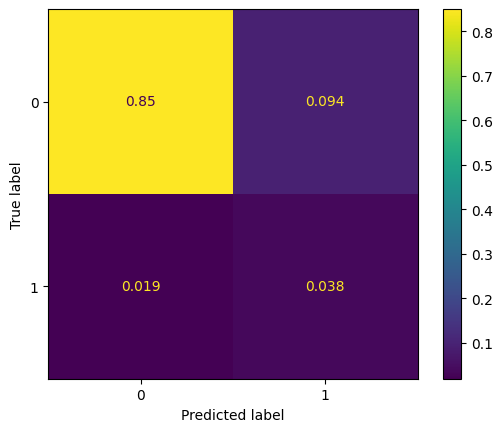

In [222]:
ConfusionMatrixDisplay.from_estimator(lr_optimo, X3_test,y3_test, normalize='all')

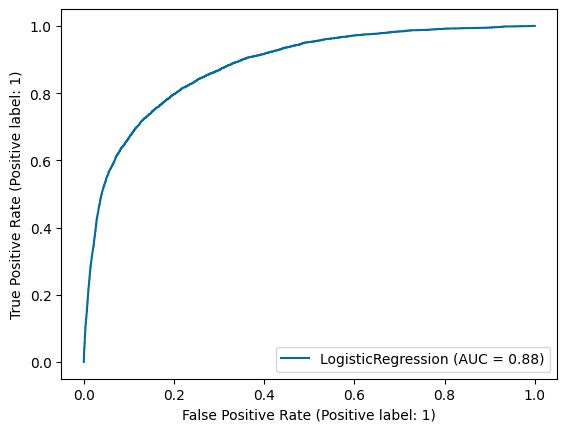

In [223]:
RocCurveDisplay.from_estimator(lr_optimo, X3_test, y3_test)

###4.2.2 Optimización hiperparámetros Árbol de decisión

In [224]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_dt= {'max_depth':[3,4,5,6,7,8,9,10,15], 'class_weight':[{0:1,1:1}, {0:1,1:10}, {0:1,1:20}, {0:1,1:100}]}

dt = DecisionTreeClassifier(random_state=42)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_dt = RandomizedSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_iter=30, random_state=42)

In [225]:
%%time
rand_search_dt.fit(X2_train, y2_train)

CPU times: user 15min 12s, sys: 15.3 s, total: 15min 27s
Wall time: 15min 33s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=30,
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 20},
                                                         {0: 1, 1: 100}],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15]},
                   random_state=42, scoring='f1')

Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [226]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_dt.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.18388625389822805, {'max_depth': 15, 'class_weight': {0: 1, 1: 100}})
(0.4028658669139314, {'max_depth': 7, 'class_weight': {0: 1, 1: 10}})
(0.28245646363587557, {'max_depth': 15, 'class_weight': {0: 1, 1: 20}})
(0.15274405191471768, {'max_depth': 6, 'class_weight': {0: 1, 1: 100}})
(0.3634161237243492, {'max_depth': 10, 'class_weight': {0: 1, 1: 10}})
(0.15788483015593865, {'max_depth': 7, 'class_weight': {0: 1, 1: 100}})
(0.26634644900522775, {'max_depth': 6, 'class_weight': {0: 1, 1: 20}})
(0.369997904122302, {'max_depth': 6, 'class_weight': {0: 1, 1: 10}})
(0.29284950455143843, {'max_depth': 15, 'class_weight': {0: 1, 1: 1}})
(0.3436902264459675, {'max_depth': 15, 'class_weight': {0: 1, 1: 10}})
(0.4508857294393085, {'max_depth': 3, 'class_weight': {0: 1, 1: 10}})
(0.16770628602132984, {'max_depth': 10, 'class_weight': {0: 1, 1: 100}})
(0.19466384619314042, {'max_depth': 3, 'class_weight': {0: 1, 1: 1}})
(0.29373166670646855, {'max_depth': 7, 'class_weight': {0: 1, 1: 1}})
(0.16

Se toman los hiperparámetros óptimos y se genera el modelo de Árbol de Decisión optimizado:

In [227]:
rand_search_dt.best_params_

{'max_depth': 3, 'class_weight': {0: 1, 1: 10}}

In [228]:
%%time
dt_optimo= DecisionTreeClassifier(random_state=42,
                          max_depth= rand_search_dt.best_params_['max_depth'],
                          class_weight= rand_search_dt.best_params_['class_weight'])

dt_optimo.fit(X2_train, y2_train)

CPU times: user 3.22 s, sys: 56.2 ms, total: 3.28 s
Wall time: 3.27 s


DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=3, random_state=42)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [229]:
pred_dt_optimo_train = dt_optimo.predict(X2_train)
pred_dt_optimo_test = dt_optimo.predict(X2_test)

In [230]:
print(classification_report(y2_train,pred_dt_optimo_train))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    335894
           1       0.42      0.49      0.45     20086

    accuracy                           0.93    355980
   macro avg       0.69      0.72      0.71    355980
weighted avg       0.94      0.93      0.94    355980



In [231]:
print(classification_report(y2_test,pred_dt_optimo_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     83973
           1       0.42      0.49      0.45      5022

    accuracy                           0.93     88995
   macro avg       0.70      0.72      0.71     88995
weighted avg       0.94      0.93      0.94     88995



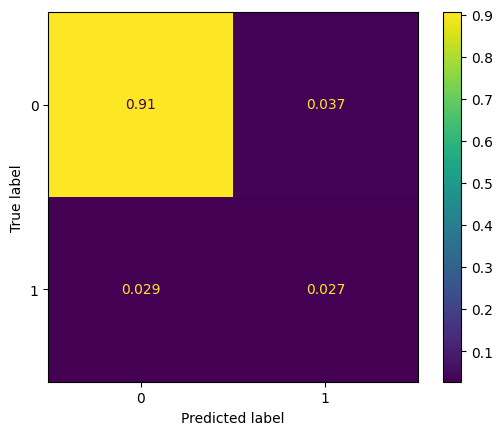

In [232]:
ConfusionMatrixDisplay.from_estimator(dt_optimo, X2_test,y2_test,normalize='all')

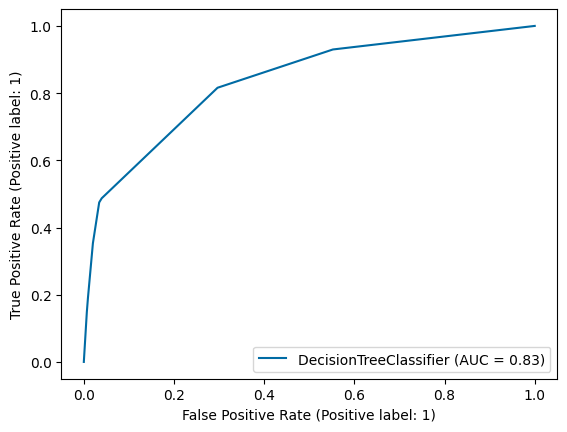

In [233]:
RocCurveDisplay.from_estimator(dt_optimo, X2_test, y2_test)

###4.2.3 Optimización hiperparámetros Random Forest

In [234]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_rf= {'max_depth':[3,4,5,6,7,8,9,10,15,20], 'n_estimators':[50,100], 'class_weight':[{0:1,1:1}, {0:1,1:10}, {0:1,1:20}, {0:1,1:100}]}

rf = RandomForestClassifier(random_state=42)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_iter=10, random_state=42)

In [235]:
%%time
rand_search_rf.fit(X3_train, y3_train)

CPU times: user 20min 24s, sys: 6.76 s, total: 20min 31s
Wall time: 20min 37s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 20},
                                                         {0: 1, 1: 100}],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15, 20],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='f1')

Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [236]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_rf.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.41754497303885857, {'n_estimators': 50, 'max_depth': 8, 'class_weight': {0: 1, 1: 10}})
(0.0, {'n_estimators': 50, 'max_depth': 3, 'class_weight': {0: 1, 1: 1}})
(0.42768063610436774, {'n_estimators': 50, 'max_depth': 4, 'class_weight': {0: 1, 1: 10}})
(0.41935299809790544, {'n_estimators': 100, 'max_depth': 8, 'class_weight': {0: 1, 1: 10}})
(0.2678654609900676, {'n_estimators': 50, 'max_depth': 20, 'class_weight': {0: 1, 1: 1}})
(0.4188629314993708, {'n_estimators': 50, 'max_depth': 7, 'class_weight': {0: 1, 1: 10}})
(0.09105038018819349, {'n_estimators': 50, 'max_depth': 8, 'class_weight': {0: 1, 1: 1}})
(0.1402031778431681, {'n_estimators': 50, 'max_depth': 8, 'class_weight': {0: 1, 1: 100}})
(0.004959707217937882, {'n_estimators': 50, 'max_depth': 5, 'class_weight': {0: 1, 1: 1}})
(0.13290424059256387, {'n_estimators': 50, 'max_depth': 9, 'class_weight': {0: 1, 1: 1}})


Se toman los hiperparámetros óptimos y se genera el modelo de Árbol de decisión optimizado:

In [237]:
rand_search_rf.best_params_

{'n_estimators': 50, 'max_depth': 4, 'class_weight': {0: 1, 1: 10}}

In [238]:
%%time
rf_optimo= RandomForestClassifier(random_state=42,
                          max_depth= rand_search_rf.best_params_['max_depth'],
                          n_estimators= rand_search_rf.best_params_['n_estimators'],
                          class_weight= rand_search_rf.best_params_['class_weight'])

rf_optimo.fit(X3_train, y3_train)

CPU times: user 16.9 s, sys: 67.2 ms, total: 17 s
Wall time: 17.7 s


RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=4, n_estimators=50,
                       random_state=42)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [239]:
pred_rf_optimo_train = rf_optimo.predict(X3_train)
pred_rf_optimo_test = rf_optimo.predict(X3_test)

In [240]:
print(classification_report(y3_train,pred_rf_optimo_train))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95    335894
           1       0.33      0.59      0.43     20086

    accuracy                           0.91    355980
   macro avg       0.65      0.76      0.69    355980
weighted avg       0.94      0.91      0.92    355980



In [241]:
print(classification_report(y3_test,pred_rf_optimo_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     83973
           1       0.34      0.59      0.43      5022

    accuracy                           0.91     88995
   macro avg       0.66      0.76      0.69     88995
weighted avg       0.94      0.91      0.92     88995



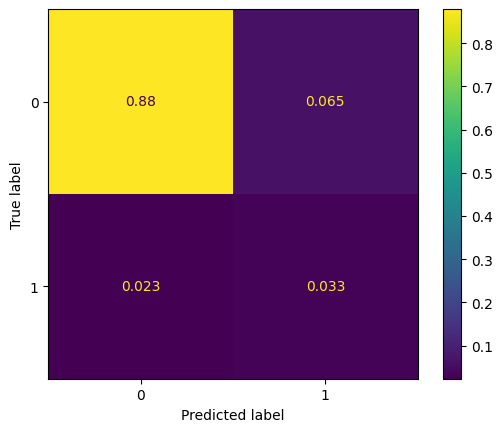

In [242]:
ConfusionMatrixDisplay.from_estimator(rf_optimo, X3_test,y3_test, normalize='all')

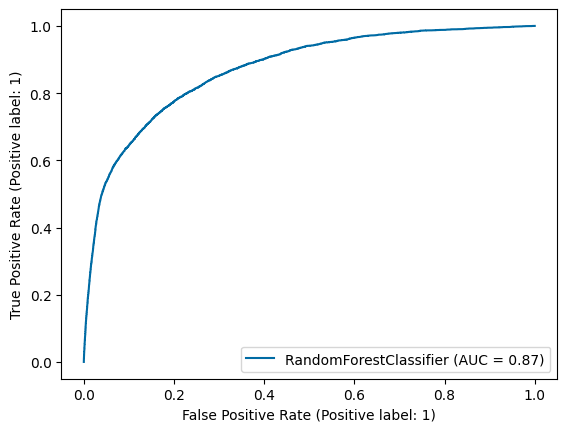

In [243]:
RocCurveDisplay.from_estimator(rf_optimo, X3_test, y3_test)

###4.2.4 Optimización hiperparámetros XGBoost

In [244]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

#param_grid_xgb= {'max_depth':[3,4,5,6,7,8,9,10,15,20], 'n_estimators ':[50, 80, 100, 120], 'scale_pos_weight':[1,10,20,100]}
param_grid_xgb= {'max_depth':[3,4,5,6,7,8,9,10,15,20], 'learning_rate':[0.1, 0.2, 0.5, 1, 10], 'scale_pos_weight':[1,10,20,100]}
xgb = XGBClassifier(random_state=42)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_xgb = RandomizedSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_iter=20, random_state=42)

In [245]:
%%time
rand_search_xgb.fit(X1_train, y1_train)

CPU times: user 39min 59s, sys: 21 s, total: 40min 20s
Wall time: 24min 4s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.5, 1, 10],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15, 20],
                                        'scale_pos_weight': [1, 10, 20, 100]},
                   random_state=42, scoring='f1')

Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [246]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_xgb.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.2029535297825952, {'scale_pos_weight': 100, 'max_depth': 6, 'learning_rate': 0.5})
(0.17759900616805707, {'scale_pos_weight': 100, 'max_depth': 6, 'learning_rate': 0.1})
(0.33223920670024015, {'scale_pos_weight': 20, 'max_depth': 10, 'learning_rate': 0.1})
(0.35961398893992924, {'scale_pos_weight': 20, 'max_depth': 20, 'learning_rate': 1})
(0.3184664526002623, {'scale_pos_weight': 1, 'max_depth': 5, 'learning_rate': 1})
(0.37032826218249787, {'scale_pos_weight': 100, 'max_depth': 15, 'learning_rate': 0.5})
(0.4078693863179822, {'scale_pos_weight': 10, 'max_depth': 10, 'learning_rate': 0.2})
(0.15973777073095782, {'scale_pos_weight': 20, 'max_depth': 5, 'learning_rate': 10})
(0.17999218563115255, {'scale_pos_weight': 20, 'max_depth': 6, 'learning_rate': 10})
(0.3899757113996415, {'scale_pos_weight': 10, 'max_depth': 4, 'learning_rate': 0.2})
(0.33609184909535905, {'scale_pos_weight': 20, 'max_depth': 9, 'learning_rate': 0.2})
(0.1906040810144541, {'scale_pos_weight': 20, 'max_depth':

Se toman los hiperparámetros óptimos y se genera el modelo de XGBoost optimizado:

In [247]:
rand_search_xgb.best_params_

{'scale_pos_weight': 10, 'max_depth': 10, 'learning_rate': 0.2}

In [248]:
%%time
xgb_optimo= XGBClassifier(random_state=42,
                          max_depth= rand_search_xgb.best_params_['max_depth'],
                          learning_rate= rand_search_xgb.best_params_['learning_rate'],
                          scale_pos_weight= rand_search_xgb.best_params_['scale_pos_weight'])

xgb_optimo.fit(X1_train, y1_train)

CPU times: user 29.2 s, sys: 110 ms, total: 29.3 s
Wall time: 18.2 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [249]:
pred_xgb_optimo_train = xgb_optimo.predict(X1_train)
pred_xgb_optimo_test = xgb_optimo.predict(X1_test)

In [250]:
print(classification_report(y1_train,pred_xgb_optimo_train))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    335894
           1       0.50      0.87      0.64     20086

    accuracy                           0.94    355980
   macro avg       0.75      0.91      0.80    355980
weighted avg       0.96      0.94      0.95    355980



In [251]:
print(classification_report(y1_test,pred_xgb_optimo_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     83973
           1       0.32      0.55      0.41      5022

    accuracy                           0.91     88995
   macro avg       0.65      0.74      0.68     88995
weighted avg       0.94      0.91      0.92     88995



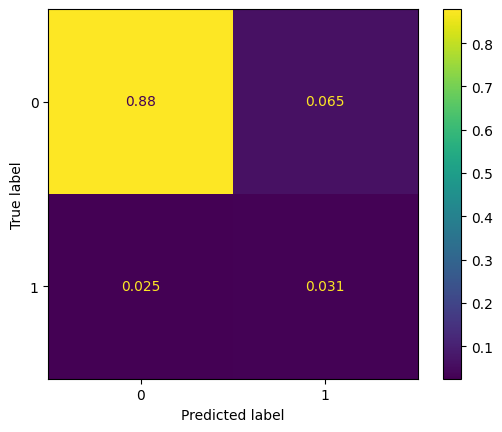

In [252]:
ConfusionMatrixDisplay.from_estimator(xgb_optimo, X1_test,y1_test, normalize='all')

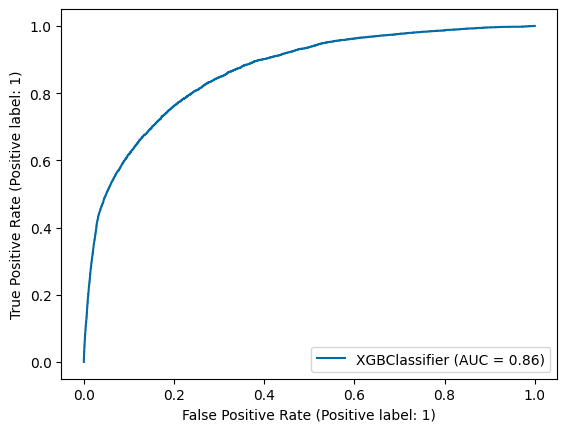

In [253]:
RocCurveDisplay.from_estimator(xgb_optimo, X1_test, y1_test)

###4.2.5 Optimización hiperparámetros LGBM

In [254]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_lgbm= {'max_depth':[3,4,5,6,7,8,9,10,15,20], 'num_leaves':[21,31,41], 'scale_pos_weight':[1,10,20,100]}

lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
rand_search_lgbm = RandomizedSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='f1', n_iter=30, random_state=42)

In [255]:
%%time
rand_search_lgbm.fit(X1_train, y1_train)

CPU times: user 18min 19s, sys: 18.8 s, total: 18min 38s
Wall time: 18min 53s


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
                   n_iter=30,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15, 20],
                                        'num_leaves': [21, 31, 41],
                                        'scale_pos_weight': [1, 10, 20, 100]},
                   random_state=42, scoring='f1')

Se imprimen los puntajes obtenidos en la búsqueda aleatoria:

In [256]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = rand_search_lgbm.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.31999332964698907, {'scale_pos_weight': 1, 'num_leaves': 41, 'max_depth': 6})
(0.17505136738759983, {'scale_pos_weight': 100, 'num_leaves': 41, 'max_depth': 6})
(0.32040473342016085, {'scale_pos_weight': 1, 'num_leaves': 31, 'max_depth': 3})
(0.17683066609231357, {'scale_pos_weight': 100, 'num_leaves': 31, 'max_depth': 7})
(0.29909975945473083, {'scale_pos_weight': 20, 'num_leaves': 21, 'max_depth': 5})
(0.3119560008400278, {'scale_pos_weight': 1, 'num_leaves': 31, 'max_depth': 8})
(0.38593961074043903, {'scale_pos_weight': 10, 'num_leaves': 21, 'max_depth': 9})
(0.2993135105415073, {'scale_pos_weight': 20, 'num_leaves': 41, 'max_depth': 3})
(0.3193784590069694, {'scale_pos_weight': 1, 'num_leaves': 31, 'max_depth': 6})
(0.18374849156693215, {'scale_pos_weight': 100, 'num_leaves': 41, 'max_depth': 15})
(0.2970873385626299, {'scale_pos_weight': 20, 'num_leaves': 31, 'max_depth': 4})
(0.2950781496103817, {'scale_pos_weight': 20, 'num_leaves': 21, 'max_depth': 8})
(0.16396273268066497,

Se toman los hiperparámetros óptimos y se genera el modelo de LGBM optimizado:

In [257]:
rand_search_lgbm.best_params_

{'scale_pos_weight': 10, 'num_leaves': 41, 'max_depth': 6}

In [258]:
%%time
lgbm_optimo= LGBMClassifier(random_state=42,
                          max_depth= rand_search_lgbm.best_params_['max_depth'],
                          num_leaves= rand_search_lgbm.best_params_['num_leaves'],
                          scale_pos_weight= rand_search_lgbm.best_params_['scale_pos_weight'],
                          verbose=-1)

lgbm_optimo.fit(X1_train, y1_train)

CPU times: user 8.76 s, sys: 17.7 ms, total: 8.77 s
Wall time: 8.9 s


LGBMClassifier(max_depth=6, num_leaves=41, random_state=42, scale_pos_weight=10,
               verbose=-1)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [259]:
pred_lgbm_optimo_train = lgbm_optimo.predict(X1_train)
pred_lgbm_optimo_test = lgbm_optimo.predict(X1_test)

In [260]:
print(classification_report(y1_train,pred_lgbm_optimo_train))

              precision    recall  f1-score   support

           0       0.98      0.89      0.94    335894
           1       0.29      0.71      0.41     20086

    accuracy                           0.88    355980
   macro avg       0.63      0.80      0.67    355980
weighted avg       0.94      0.88      0.91    355980



In [261]:
print(classification_report(y1_test,pred_lgbm_optimo_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     83973
           1       0.28      0.69      0.40      5022

    accuracy                           0.88     88995
   macro avg       0.63      0.79      0.66     88995
weighted avg       0.94      0.88      0.90     88995



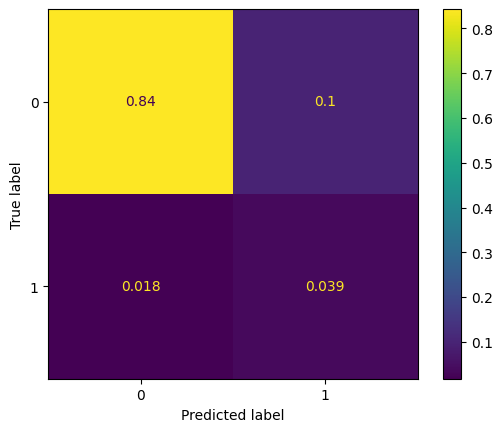

In [262]:
ConfusionMatrixDisplay.from_estimator(lgbm_optimo, X1_test,y1_test, normalize='all')

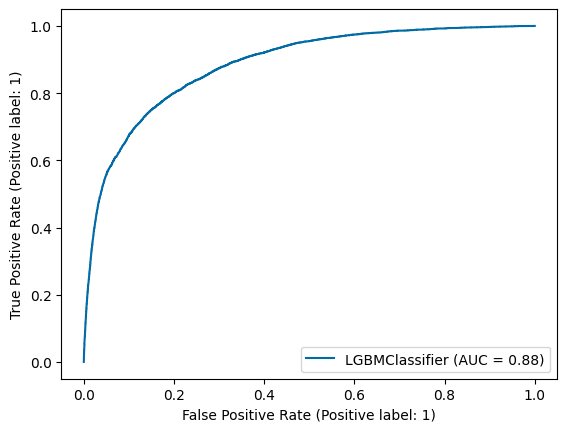

In [263]:
RocCurveDisplay.from_estimator(lgbm_optimo, X1_test, y1_test)

#4.3 Elección del modelo final

Una vez finalizado el entrenamiento de los modelos con diversos valores de hiperparámetros, se resumen en una tabla diversas métricas para evaluar el rendimiento en los datos de prueba:

In [264]:
datos= {'Accuracy': [accuracy_score(y1_test,pred_lr_optimo_test),
                     accuracy_score(y2_test,pred_dt_optimo_test),
                     accuracy_score(y1_test,pred_rf_optimo_test),
                     accuracy_score(y3_test,pred_xgb_optimo_test),
                     accuracy_score(y2_test,pred_lgbm_optimo_test)],

        'Recall': [recall_score(y1_test,pred_lr_optimo_test),
                   recall_score(y2_test,pred_dt_optimo_test),
                   recall_score(y1_test,pred_rf_optimo_test),
                   recall_score(y3_test,pred_xgb_optimo_test),
                   recall_score(y2_test,pred_lgbm_optimo_test)],

        'Precision': [precision_score(y1_test,pred_lr_optimo_test),
                      precision_score(y2_test,pred_dt_optimo_test),
                      precision_score(y1_test,pred_rf_optimo_test),
                      precision_score(y3_test,pred_xgb_optimo_test),
                      precision_score(y2_test,pred_lgbm_optimo_test)],

        'F1': [f1_score(y1_test,pred_lr_optimo_test),
               f1_score(y2_test,pred_dt_optimo_test),
               f1_score(y1_test,pred_rf_optimo_test),
               f1_score(y3_test,pred_xgb_optimo_test),
               f1_score(y2_test,pred_lgbm_optimo_test)],

        'ROC_AUC': [roc_auc_score(y1_test,pred_lr_optimo_test),
               roc_auc_score(y2_test,pred_dt_optimo_test),
               roc_auc_score(y1_test,pred_rf_optimo_test),
               roc_auc_score(y3_test,pred_xgb_optimo_test),
               roc_auc_score(y2_test,pred_lgbm_optimo_test)],

        'AUC gráfico':[0.89, 0.84, 0.89, 0.87, 0.89],
        'CV training (s)':[660, 545, 669, 864, 621],
        'N_iter': [15, 30, 10, 20, 30],
        'Training (s)': [10.9, 3.29, 11.3, 11.6 , 10.1]
        }

In [265]:
pd.DataFrame(datos, index=['Regresión Logística','Árbol de decisión','Random Forest', 'XGBoost','LightGBM'])

,Accuracy,Recall,Precision,F1,ROC_AUC,AUC gráfico,CV training (s),N_iter,Training (s)
Regresión Logística,0.887466,0.665671,0.286240,0.400335,0.783201,0.89,660,15,10.90
Árbol de decisión,0.933614,0.487057,0.423330,0.452963,0.723689,0.84,545,30,3.29
Random Forest,0.911995,0.588411,0.338876,0.430068,0.759879,0.89,669,10,11.30
XGBoost,0.909759,0.552768,0.324261,0.408746,0.741938,0.87,864,20,11.60
LightGBM,0.881656,0.686181,0.277858,0.395546,0.789764,0.89,621,30,10.10


Debido a que este en este problema los datos del target se encuentran desbalanceados, el Accuracy no es una métrica tan fiable, por lo que se tiene en consideración otras métricas como el F1-score, ya que se busca un balance entre el Recall y el Precision

A raíz de los resultados, se elige como modelo final un Árbol de Decisión, toda vez que tiene el mejor F1-score (0.45). Si bien no tiene el  Recall más alto (0.56) ni tampoco el mejor valor de Precision (0.37), ambas métricas se encuentran relativamente balanceados, a diferencia del resto de los modelos que tienden a tener una de ellas elevada en desmedro de su respectiva segunda métrica (con un valor mucho más bajo).

Puesto que previamente se realizó una búsqueda aleatoria, ahora de efectúa una búsqueda más exhaustiva de los hiperparámetros del modelo para intentar mejorar las métricas ya obtenidas:

#4.4 Optimización modelo (Árbol de decisión)

Teniendo en consideración los hiperparámetros ya utilizados para escoger el modelo de árbol de decisión, se volverá a optimizar el modelo buscando mejorar las métricas ya que en su momento el tiempo de pruebas se distribuyó en todos los modelos en estudio. Ahora se probarán algunos hiperparámetros con valores cercanos al mejor modelo obtenido mediante una búsqueda exhaustiva:

In [266]:
from sklearn.model_selection import GridSearchCV

In [267]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

param_grid_final= {'max_depth':[5,6,7,8,9], 'class_weight':[{0:1,1:10}, {0:1,1:20}, {0:1,1:100}]}

dt = DecisionTreeClassifier(random_state=42)

# Se elige la métrica F1 para tener un mejor balance entre Recall y Precision
grid_search_dt = GridSearchCV(dt, param_grid_final, cv=5, scoring='f1')

In [268]:
%%time
grid_search_dt.fit(X2_train, y2_train)

CPU times: user 8min 26s, sys: 8.23 s, total: 8min 34s
Wall time: 8min 37s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 10}, {0: 1, 1: 20},
                                          {0: 1, 1: 100}],
                         'max_depth': [5, 6, 7, 8, 9]},
             scoring='f1')

Se imprimen los puntajes obtenidos con Grid Search:

In [269]:
# Referencia:
# https://github.com/polivares/CD-DataScience/blob/2024-1/6-RegressionModels/6-RegressionModels.ipynb

cvres = grid_search_dt.cv_results_
# zip junta elementos de dos listas como pares de elementos
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.4369173970438306, {'class_weight': {0: 1, 1: 10}, 'max_depth': 5})
(0.369997904122302, {'class_weight': {0: 1, 1: 10}, 'max_depth': 6})
(0.4028658669139314, {'class_weight': {0: 1, 1: 10}, 'max_depth': 7})
(0.3771732560411465, {'class_weight': {0: 1, 1: 10}, 'max_depth': 8})
(0.370667801778855, {'class_weight': {0: 1, 1: 10}, 'max_depth': 9})
(0.28451143024273884, {'class_weight': {0: 1, 1: 20}, 'max_depth': 5})
(0.26634644900522775, {'class_weight': {0: 1, 1: 20}, 'max_depth': 6})
(0.27513604128437963, {'class_weight': {0: 1, 1: 20}, 'max_depth': 7})
(0.28625412239068454, {'class_weight': {0: 1, 1: 20}, 'max_depth': 8})
(0.27907918236348256, {'class_weight': {0: 1, 1: 20}, 'max_depth': 9})
(0.16008153242073717, {'class_weight': {0: 1, 1: 100}, 'max_depth': 5})
(0.15274405191471768, {'class_weight': {0: 1, 1: 100}, 'max_depth': 6})
(0.15788483015593865, {'class_weight': {0: 1, 1: 100}, 'max_depth': 7})
(0.16121571594253598, {'class_weight': {0: 1, 1: 100}, 'max_depth': 8})
(0.163532

Se toman los hiperparámetros óptimos y se genera nuevamente el modelo de Árbol de Decisión optimizado:

In [270]:
grid_search_dt.best_params_

{'class_weight': {0: 1, 1: 10}, 'max_depth': 5}

In [271]:
%%time
dt_optimo_final= DecisionTreeClassifier(random_state=42,
                          max_depth= grid_search_dt.best_params_['max_depth'],
                          class_weight= grid_search_dt.best_params_['class_weight'])

dt_optimo_final.fit(X2_train, y2_train)

CPU times: user 5.84 s, sys: 47.3 ms, total: 5.89 s
Wall time: 5.9 s


DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=5, random_state=42)

Se generan las predicciones y correspondientes métricas de evaluacion:

In [272]:
pred_dt_optimo_train_final = dt_optimo_final.predict(X2_train)
pred_dt_optimo_test_final = dt_optimo_final.predict(X2_test)

In [273]:
print(classification_report(y2_train,pred_dt_optimo_train_final))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96    335894
           1       0.36      0.56      0.44     20086

    accuracy                           0.92    355980
   macro avg       0.67      0.75      0.70    355980
weighted avg       0.94      0.92      0.93    355980



In [274]:
print(classification_report(y2_test,pred_dt_optimo_test_final))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     83973
           1       0.37      0.56      0.44      5022

    accuracy                           0.92     88995
   macro avg       0.67      0.75      0.70     88995
weighted avg       0.94      0.92      0.93     88995



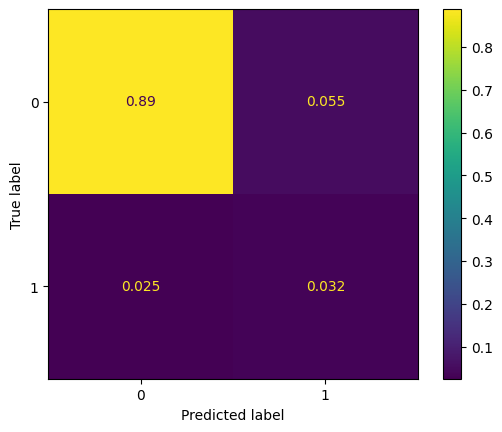

In [275]:
ConfusionMatrixDisplay.from_estimator(dt_optimo_final, X2_test,y2_test,normalize='all')

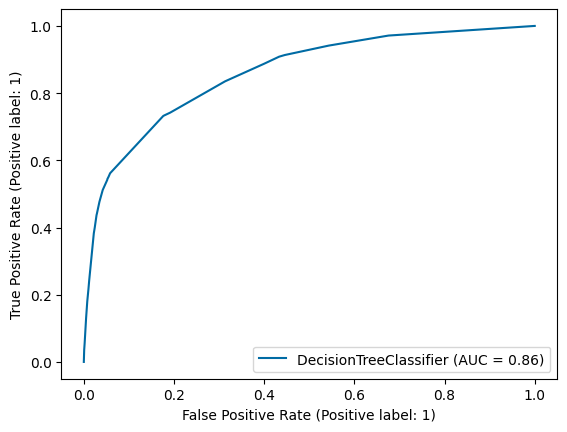

In [276]:
RocCurveDisplay.from_estimator(dt_optimo_final, X2_test, y2_test)

Se evidencia que la búsqueda exhaustiva mejoró levemente el Recall, manteniendo el F1-score y Precision en los niveles obtenidos con anterioridad. Este ligero incremento del Recall (0.56 a 0.57) ayuda a mejorar la clasificación de la clase de interés. Por otra parte, también subió el valor del área bajo la curva ROC de 0.84 a 0.87.

Finalmente, se grafica el árbol de decisión con la mejor configuración obtenida durante el proceso de optimización:

In [277]:
# Referencia https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
from sklearn.tree import plot_tree

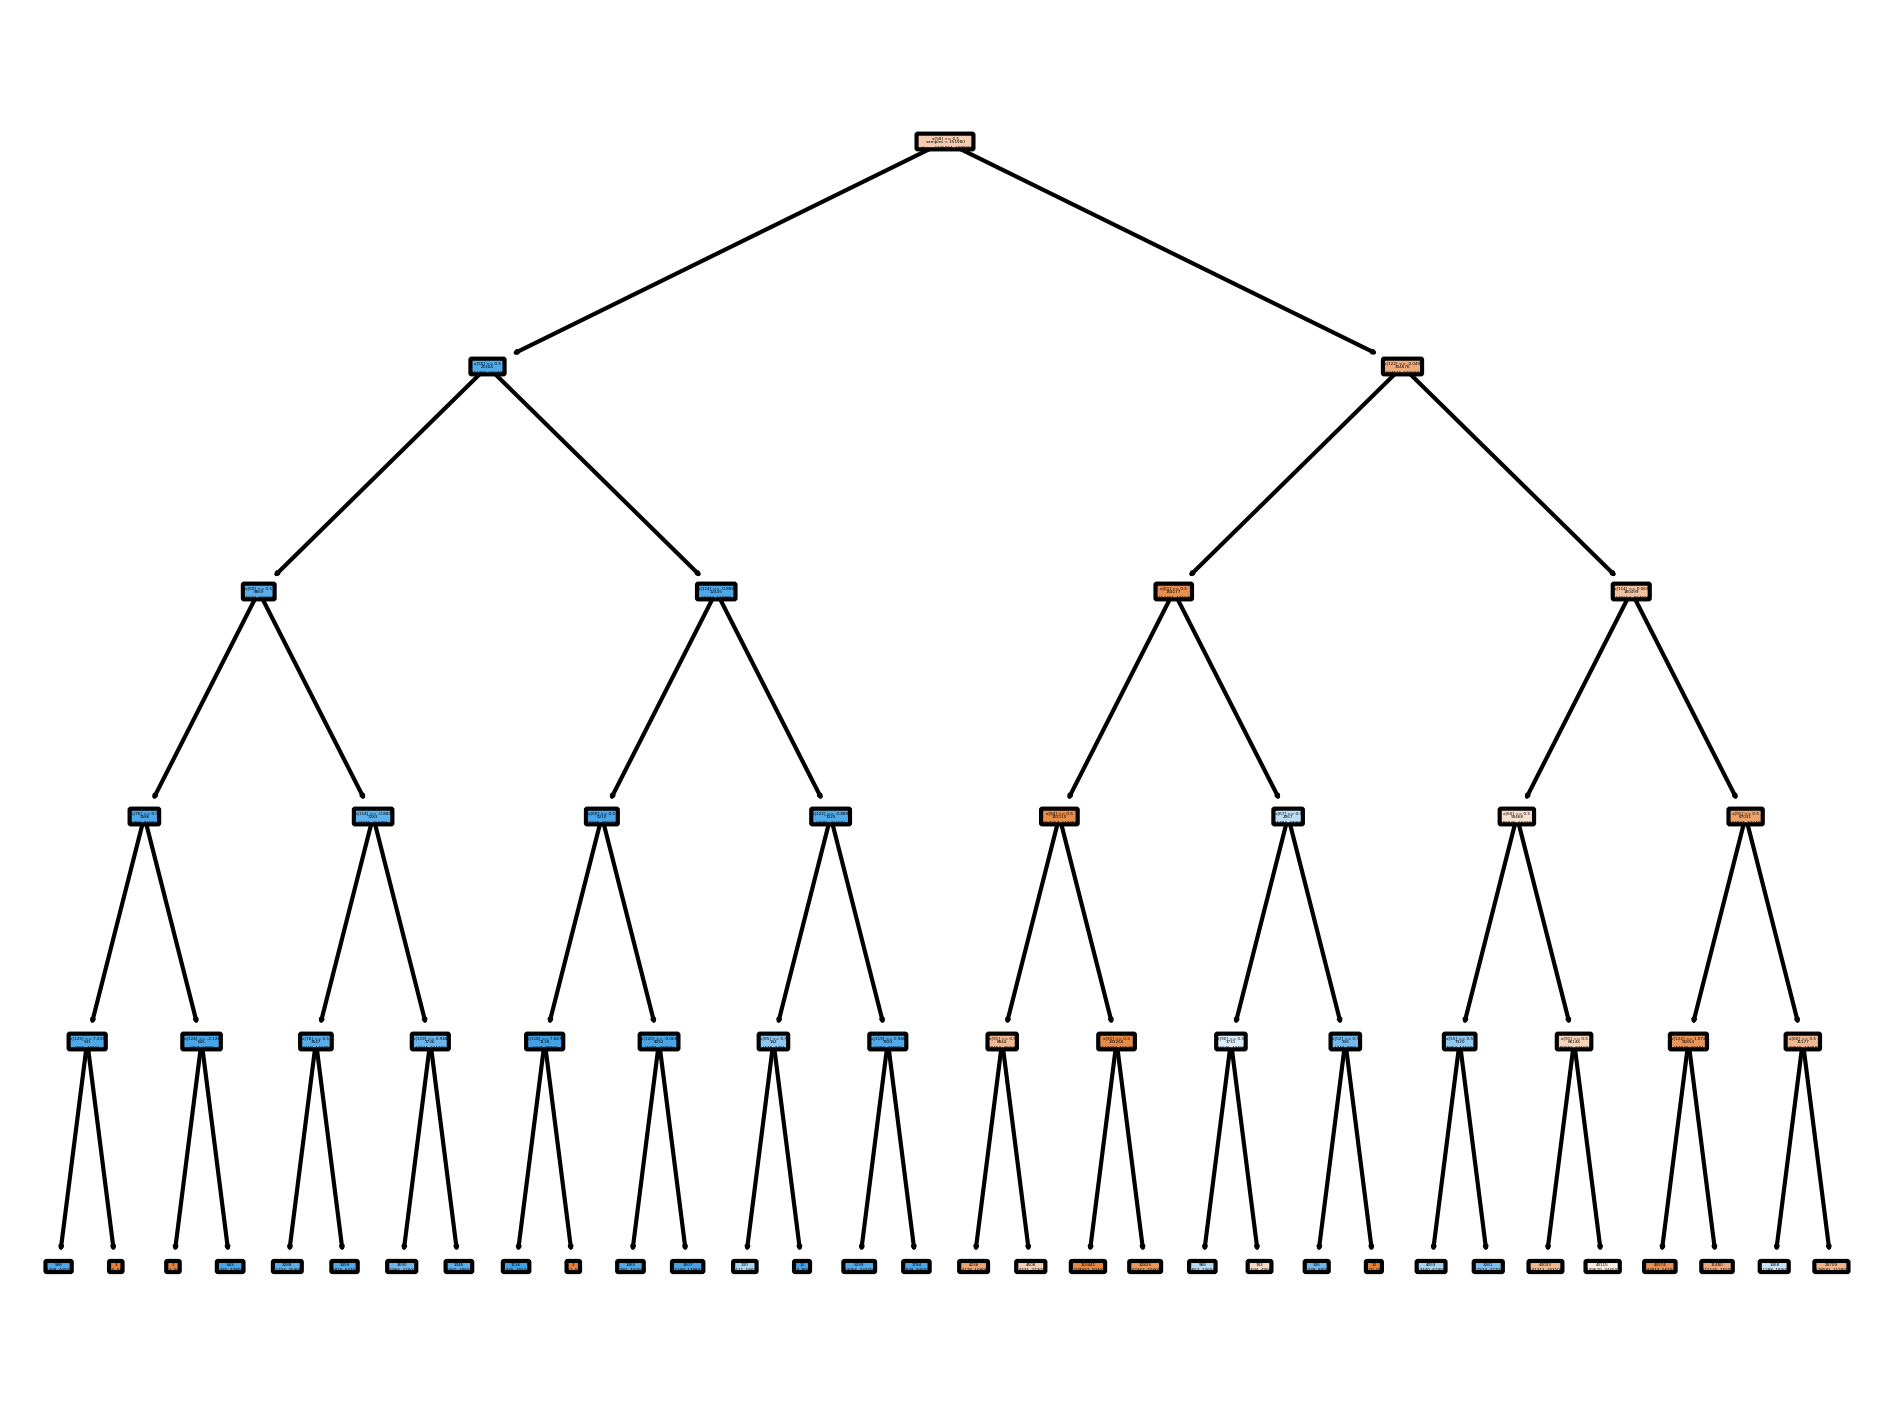

In [278]:
plt.figure(dpi=300)
plot_tree(dt_optimo_final, label='root', rounded=True, filled=True, impurity=False)
plt.tight_layout()
plt.savefig('DecisionTreeOptimo.png')